In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dataframe_image as dfi


In [2]:
ordersdata=pd.read_csv("customer_orders.csv")
customerorders=pd.read_csv("order_details.csv")

In [3]:
df=pd.merge(ordersdata,customerorders, on='order_id',how='outer')
pd.options.display.max_rows = 10
df

,customer_id,order_id,order_date,price_paid,product_category
0,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,243.099450,Shirt
1,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,1165.870800,Jacket
2,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,142.133400,Shirt
3,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,168.345000,Shirt
4,a3ad45dfd9b8418bd297,815cfa12d98638839fac,2014-08-16,2229.209100,Jacket
...,...,...,...,...,...
132883,9ebb8a702ac86078b27d,8f579e267292a33ecbe3,2020-10-13,968.655046,Pants
132884,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,2046.939862,Jacket
132885,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,465.350572,Pants
132886,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,209.268153,Shirt


In [4]:
df['Start of Data'] = pd.Series(["2014-08-16" for x in range(len(df.index))])
df['Start of Data']=pd.to_datetime(df['Start of Data'])
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date_week']=df['order_date'].dt.week
df['order_date_month']=df['order_date'].dt.month
df['order_date_week']=df['order_date'].dt.week
df['order_date_year']=df['order_date'].dt.year
df['quarter'] = df['order_date'].dt.to_period('Q')
df['fiscal_quarter'] = df['order_date'].dt.quarter
df['weeks_since_start'] = df['order_date'] - df['Start of Data']
df["weeks_since_start"] = round(df["weeks_since_start"].dt.days/7+1)
df["months_since_start"] = df['order_date'] - df['Start of Data']
df["months_since_start"] = round(df["months_since_start"]/np.timedelta64(1,'M')+1)
df.drop(columns=['Start of Data'])


,customer_id,order_id,order_date,price_paid,product_category,order_date_week,order_date_month,order_date_year,quarter,fiscal_quarter,weeks_since_start,months_since_start
0,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,243.099450,Shirt,33,8,2014,2014Q3,3,1.0,1.0
1,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,1165.870800,Jacket,33,8,2014,2014Q3,3,1.0,1.0
2,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,142.133400,Shirt,33,8,2014,2014Q3,3,1.0,1.0
3,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,168.345000,Shirt,33,8,2014,2014Q3,3,1.0,1.0
4,a3ad45dfd9b8418bd297,815cfa12d98638839fac,2014-08-16,2229.209100,Jacket,33,8,2014,2014Q3,3,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
132883,9ebb8a702ac86078b27d,8f579e267292a33ecbe3,2020-10-13,968.655046,Pants,42,10,2020,2020Q4,4,322.0,75.0
132884,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,2046.939862,Jacket,42,10,2020,2020Q4,4,322.0,75.0
132885,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,465.350572,Pants,42,10,2020,2020Q4,4,322.0,75.0
132886,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,209.268153,Shirt,42,10,2020,2020Q4,4,322.0,75.0


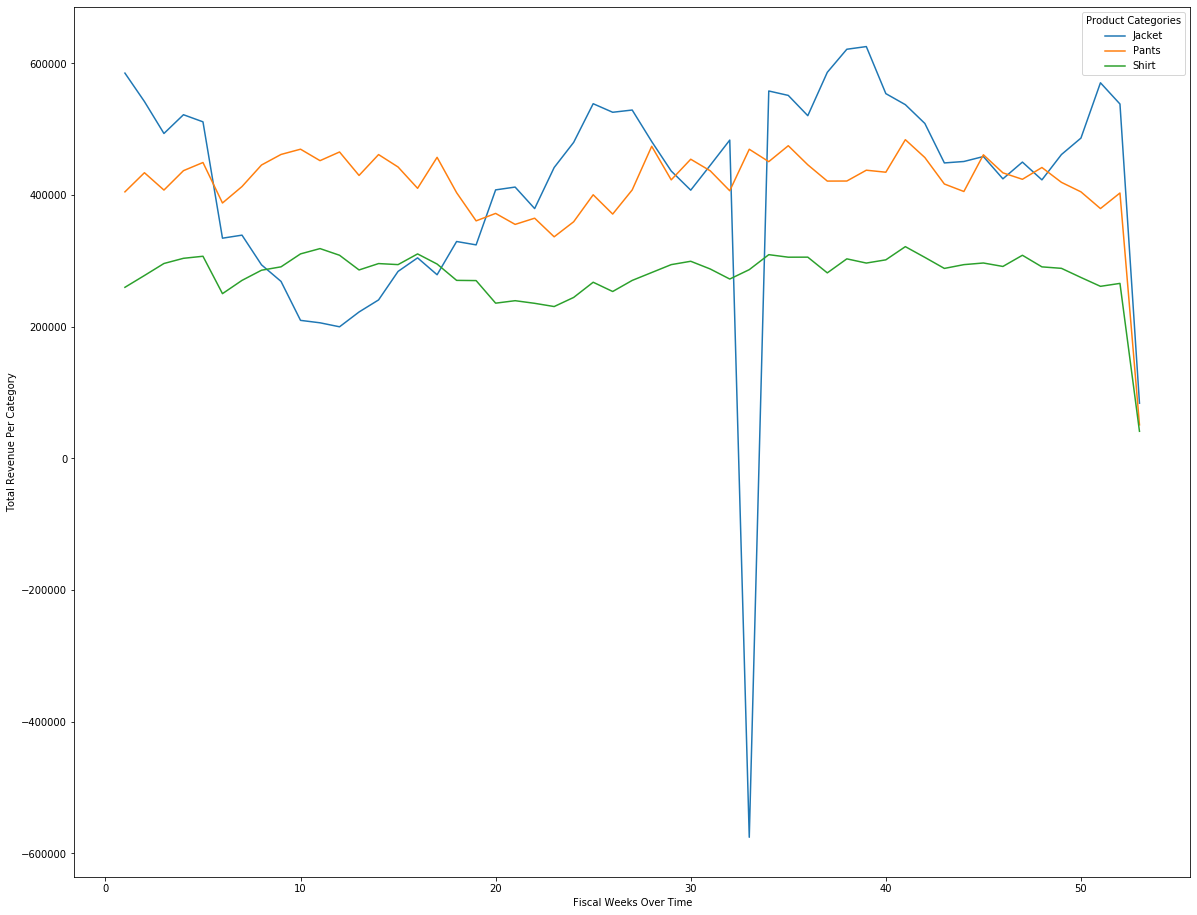

In [5]:
# 1. Total spend per week across the customer base over time.
# Total spend per fiscal week over time




salesbyfiscalweek=df.groupby(['order_date_week','product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()
salesbyfiscalweekpivot=salesbyfiscalweek.pivot('order_date_week','product_category','sum')

ax=salesbyfiscalweekpivot.plot(kind='line', figsize=(20, 16))
ax.set_ylabel('Total Revenue Per Category')
ax.set_xlabel('Fiscal Weeks Over Time')
plt.legend(title='Product Categories')
plt.savefig('categorysalesbyfiscalweek.png') 
plt.show()


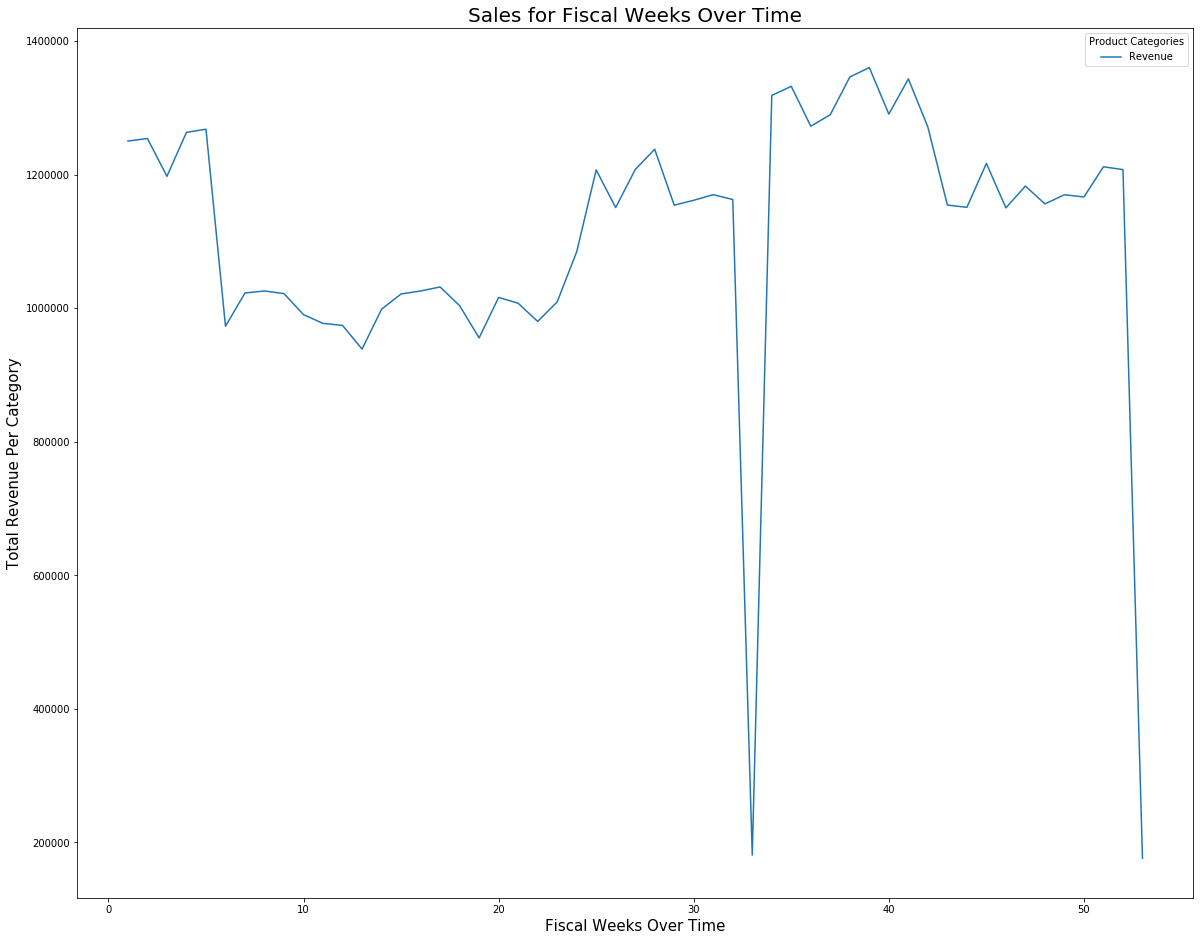

In [6]:
totalsalesbyfiscalweek=df.groupby('order_date_week')['price_paid'].sum()

ax=totalsalesbyfiscalweek.plot(kind='line', figsize=(20, 16), label="Revenue")
ax.set_ylabel('Total Revenue Per Category',fontsize=15)
ax.set_xlabel('Fiscal Weeks Over Time',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
plt.savefig('totalsalesbyfiscalweek.png') 
plt.title("Sales for Fiscal Weeks Over Time",fontsize=20)
plt.show()


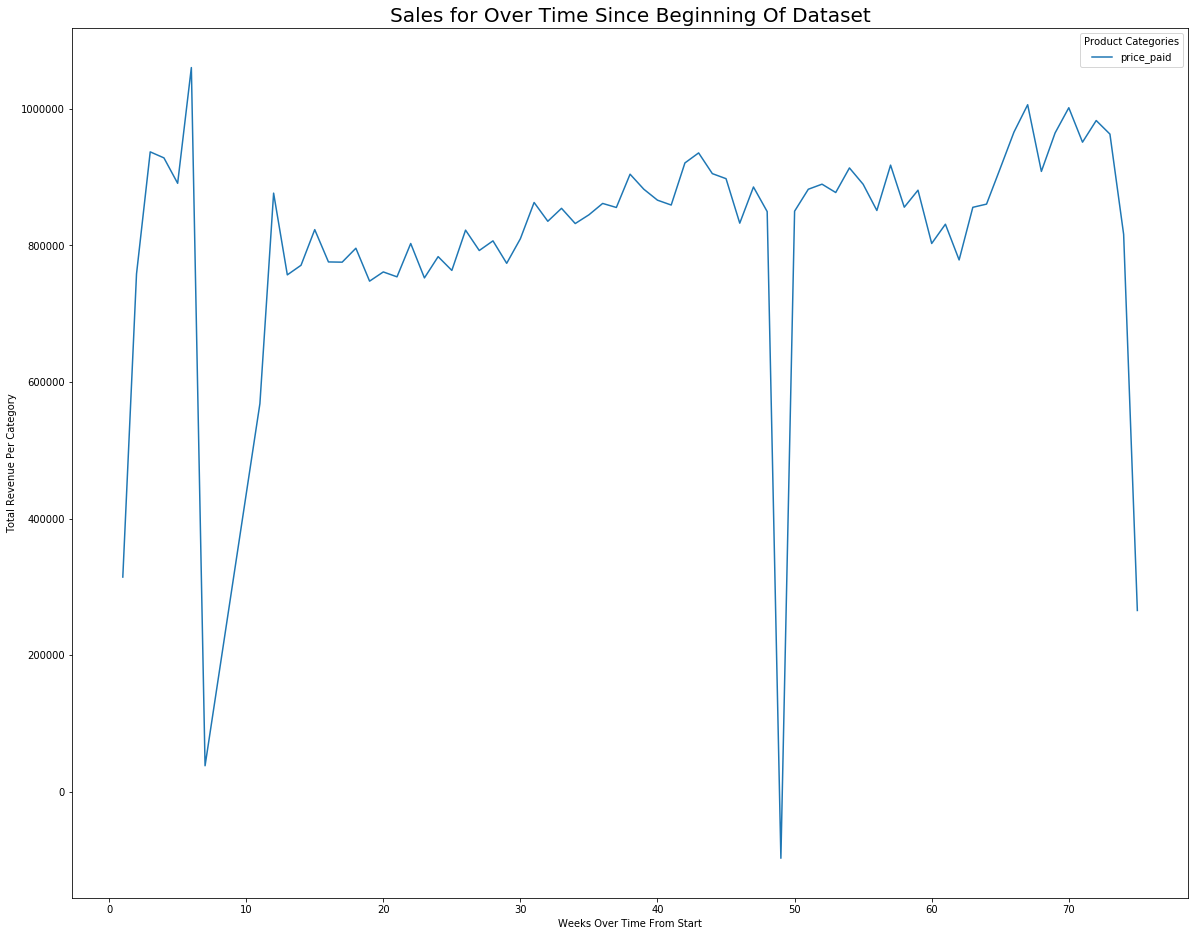

In [7]:
totalsalesbystartweek=df.groupby('months_since_start')['price_paid'].sum()

ax=totalsalesbystartweek.plot(kind='line', figsize=(20, 16))
ax.set_ylabel('Total Revenue Per Category')
ax.set_xlabel('Weeks Over Time From Start')
plt.legend(title='Product Categories')
plt.savefig('weekssincestartrevenue.png') 
plt.title("Sales for Over Time Since Beginning Of Dataset",fontsize=20)
plt.show()

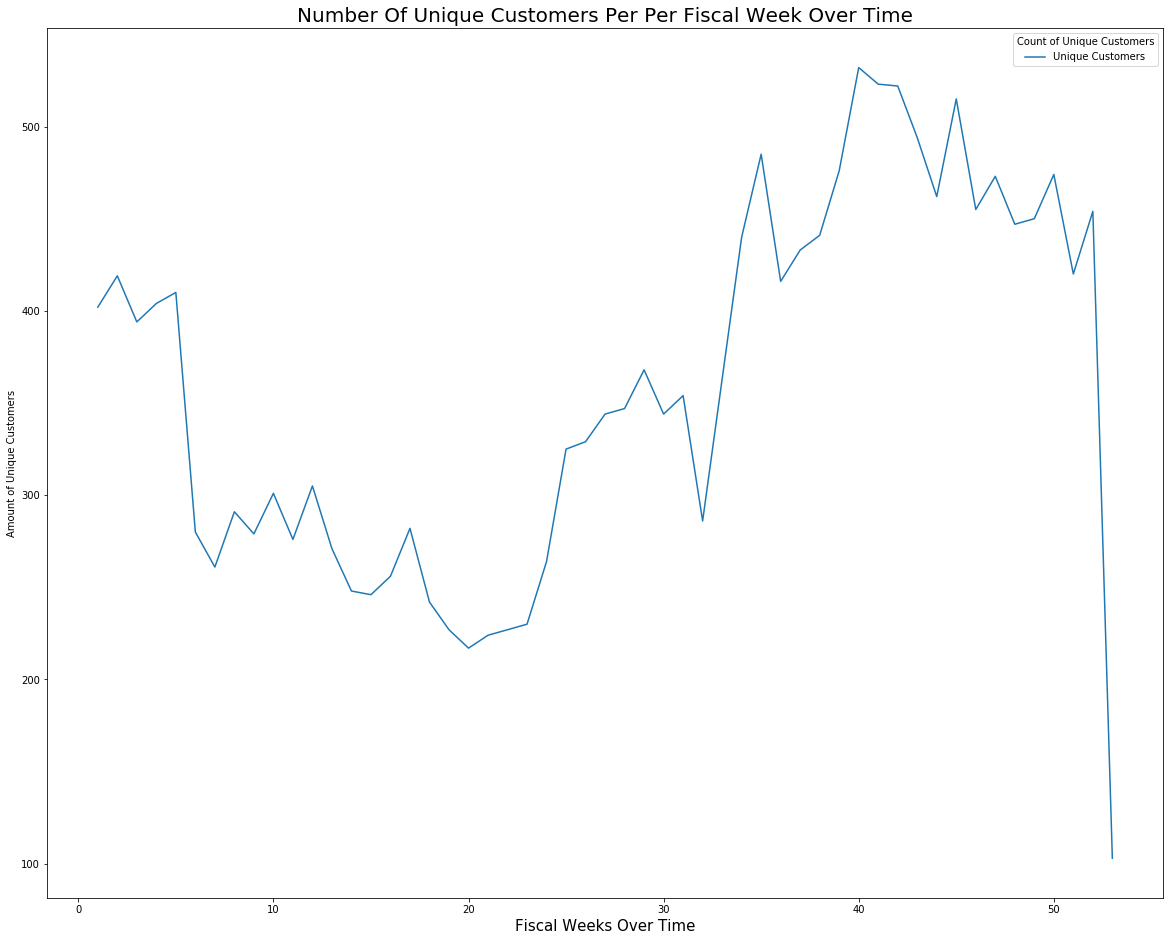

In [8]:
uniqueuniquecustomersperweek=df.drop_duplicates('customer_id')
uniqueuniquecustomersperweekfiscal=uniqueuniquecustomersperweek.groupby('order_date_week')['customer_id'].nunique()

ax=uniqueuniquecustomersperweekfiscal.plot(kind='line', label='Unique Customers', figsize=(20, 16))
ax.set_ylabel('Amount of Unique Customers')
ax.set_xlabel('Fiscal Weeks Over Time', fontsize=15)
plt.legend(title='Count of Unique Customers',fontsize=10)
plt.savefig('uniquebyfiscalweeknoduplicates.png') 
plt.title("Number Of Unique Customers Per Per Fiscal Week Over Time",fontsize=20)
plt.show()


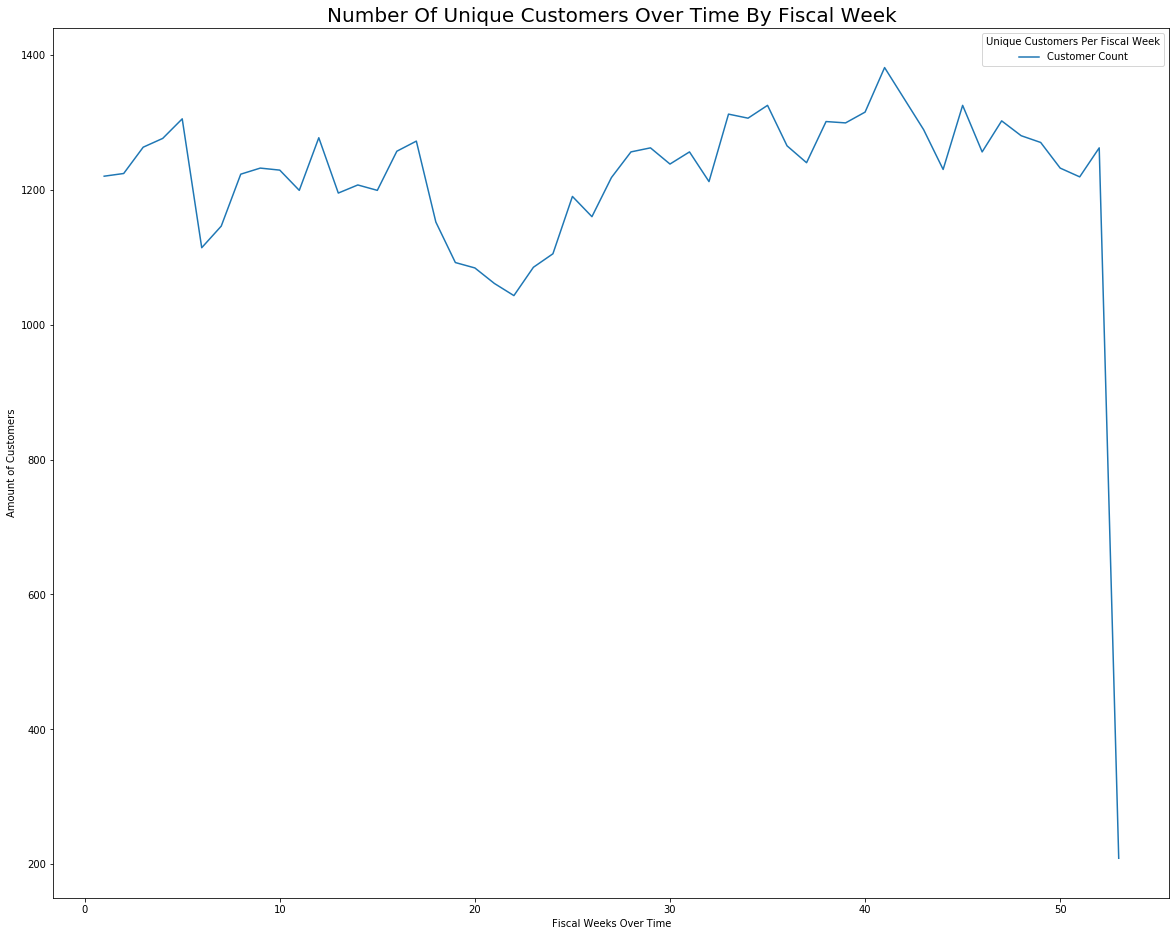

In [9]:
# 2. Number of unique customers per week across the customer base over time.
#Get count of unique customers per week by fiscal week
uniquebyfiscalweek=df.groupby('order_date_week')['customer_id'].nunique()

uniquebyfiscalweek

ax=uniquebyfiscalweek.plot(kind='line', label='Customer Count',figsize=(20, 16))
ax.set_ylabel('Amount of Customers')
ax.set_xlabel('Fiscal Weeks Over Time')
plt.legend(title='Unique Customers Per Fiscal Week')
plt.title("Number Of Unique Customers Over Time By Fiscal Week",fontsize=20)
plt.savefig('uniqueuserbyfiscalweek.png') 
plt.show()

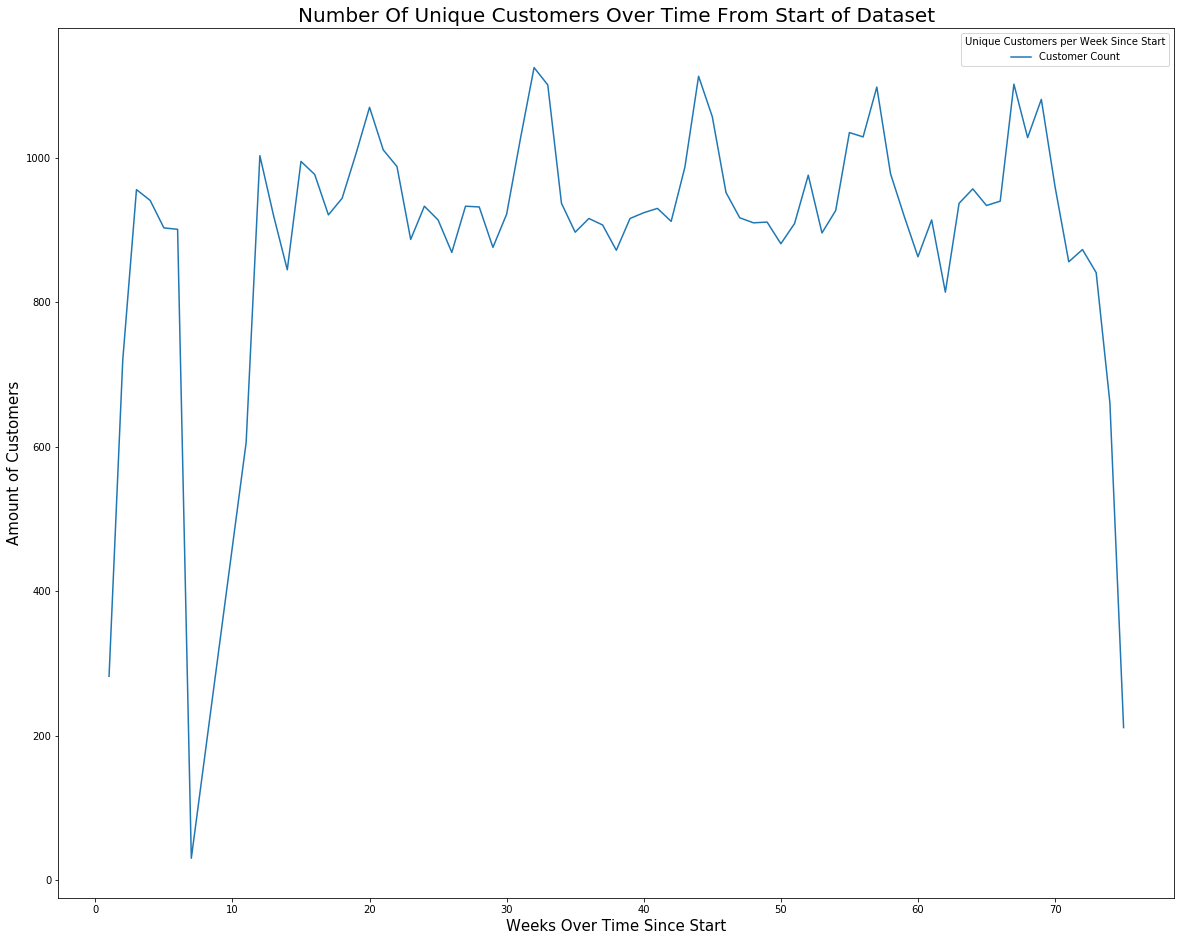

In [10]:
uniquebystartweek=df.groupby('months_since_start')['customer_id'].nunique()

uniquebyfiscalweek

ax=uniquebystartweek.plot(kind='line', label='Customer Count',figsize=(20, 16))
ax.set_ylabel('Amount of Customers',fontsize=15)
ax.set_xlabel('Weeks Over Time Since Start',fontsize=15)
plt.legend(title='Unique Customers per Week Since Start',fontsize=10)
plt.title("Number Of Unique Customers Over Time From Start of Dataset",fontsize=20)
plt.savefig('uniqueuserbystartweek.png') 
plt.show()

In [11]:
uniquebyfiscalweek.agg(['max','min','mean']).reset_index()

,index,customer_id
0,max,1381.000000
1,min,209.000000
2,mean,1211.415094


In [12]:
uniquebyfiscalweekproduct=df.groupby(['order_date_week','product_category'])['customer_id'].nunique().reset_index(name="unique_customers")
uniquebyfiscalweekproductpivot=uniquebyfiscalweekproduct.pivot('order_date_week','product_category','unique_customers')

# ax=uniquebyfiscalweekproductpivot.plot(kind='bar', stacked=True,figsize=(20, 16))
# ax.set_ylabel('Number Of Unique Customers Per Category Per Week')
# ax.set_xlabel('Sales By Fiscal Week')
# plt.legend(title='Product Categories')
# plt.savefig('productsperweekcategory.png') 
# # plt.show()

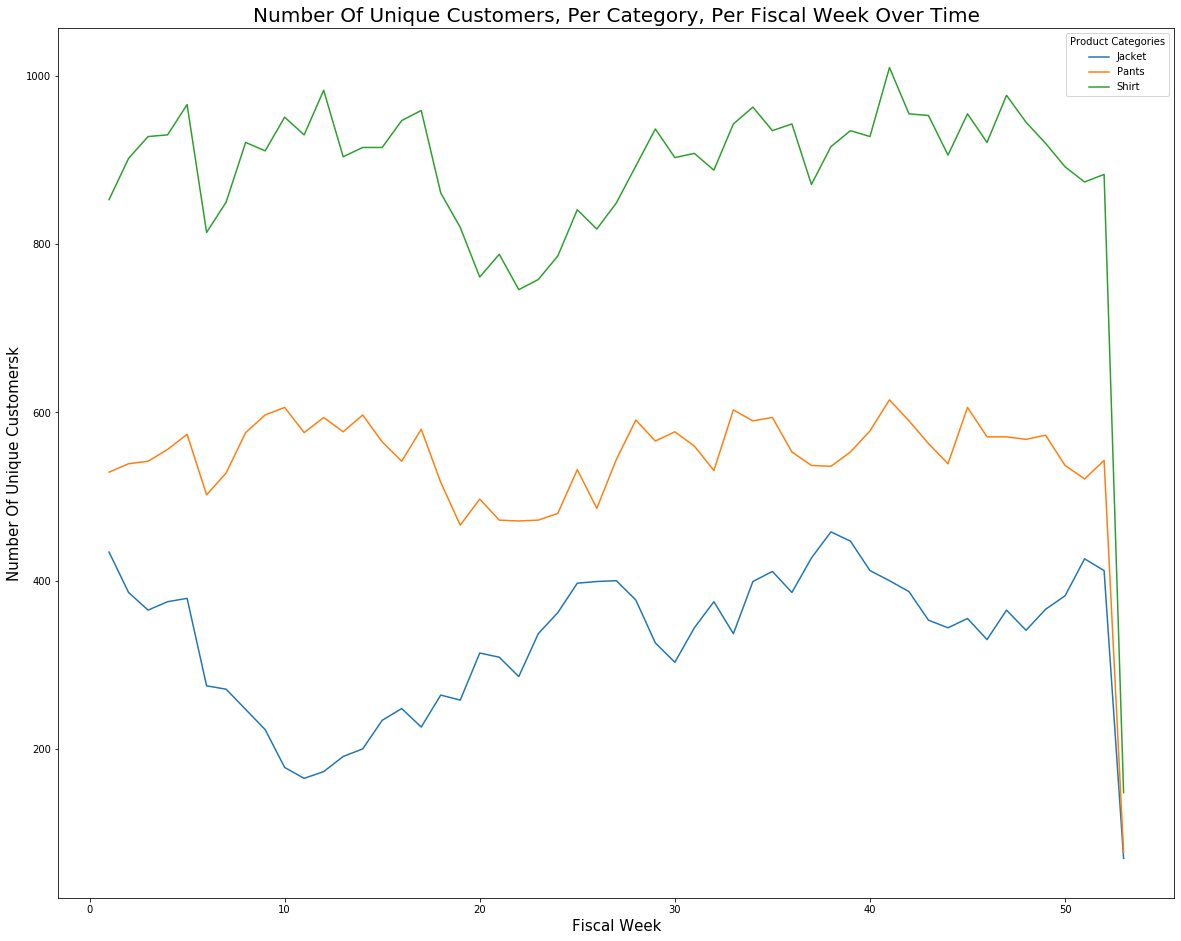

In [13]:
uniquebyfiscalweekproduct=df.groupby(['order_date_week','product_category'])['customer_id'].nunique().reset_index()
uniquebyfiscalweekproductpivot=uniquebyfiscalweekproduct.pivot('order_date_week','product_category','customer_id')

ax=uniquebyfiscalweekproductpivot.plot(kind='line',figsize=(20, 16))
ax.set_ylabel('Number Of Unique Customersk',fontsize=15)
ax.set_xlabel('Fiscal Week',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
plt.savefig('productsperweekcategoryline.png') 
plt.title("Number Of Unique Customers, Per Category, Per Fiscal Week Over Time",fontsize=20)
plt.show()

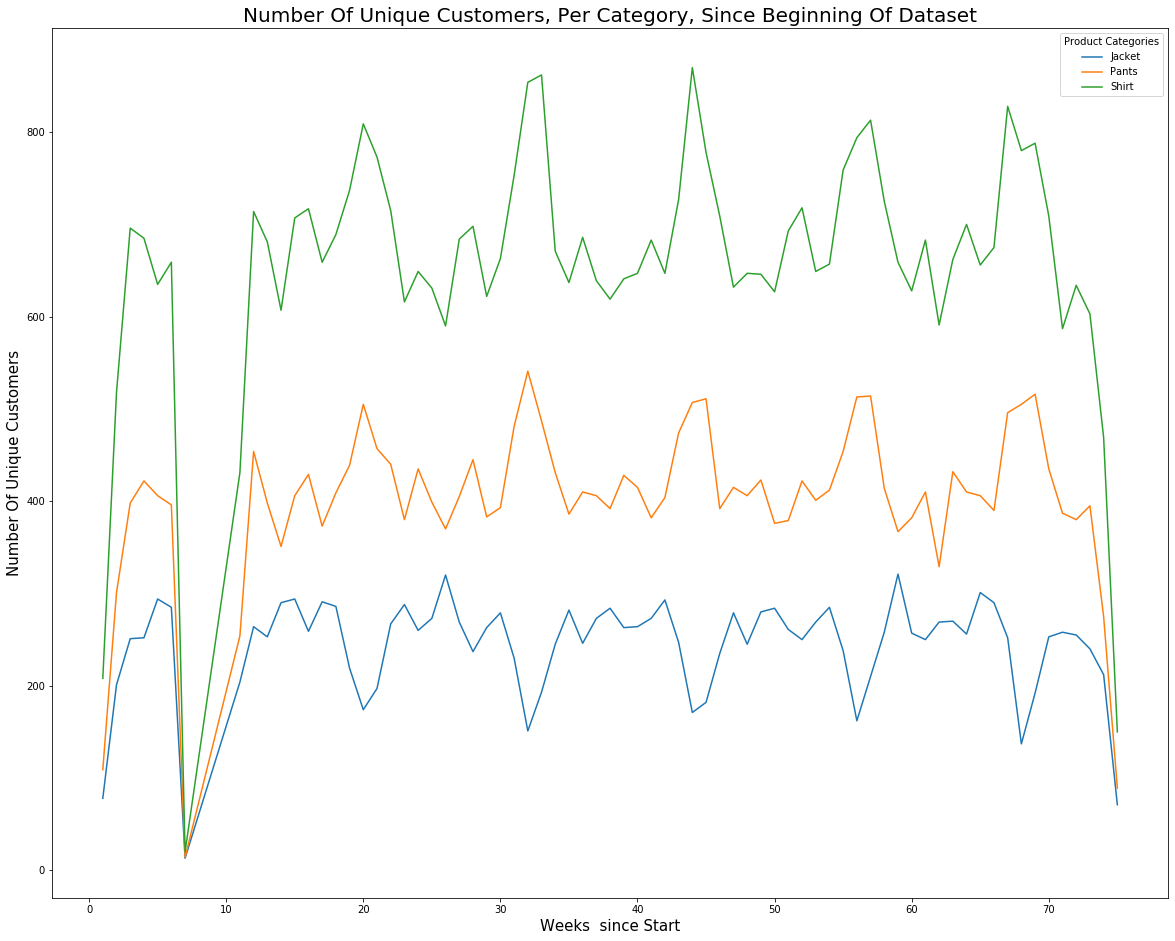

In [14]:
uniquebyweeksincestartproduct=df.groupby(['months_since_start','product_category'])['customer_id'].nunique().reset_index()
uniquebyweeksincestartproductpivot=uniquebyweeksincestartproduct.pivot('months_since_start','product_category','customer_id')

ax=uniquebyweeksincestartproductpivot.plot(kind='line',figsize=(20, 16))
ax.set_ylabel('Number Of Unique Customers',fontsize=15)
ax.set_xlabel('Weeks  since Start',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
plt.title("Number Of Unique Customers, Per Category, Since Beginning Of Dataset",fontsize=20)
plt.savefig('productscategorysincestartline.png') 
plt.show()

In [15]:
# salesbyyear=df.groupby("order_date_year")['price_paid'].sum()
# salesbyyear.pivot=[("order_date_year",'price_paid')]

In [16]:
# salesbyyear=df.groupby(['order_date_year', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()

# salesbyyearpivot=salesbyyear.pivot("order_date_year", "product_category", "sum")

In [17]:
# yeardf = df.groupby(["order_date_year",'customer_id'])['price_paid'].sum().reset_index()
# yeardf

In [18]:
df2018=df[(df['order_date_year'] == 2018)]
df2018.sort_values(by='price_paid', ascending=True)

,customer_id,order_id,order_date,price_paid,product_category,Start of Data,order_date_week,order_date_month,order_date_year,quarter,fiscal_quarter,weeks_since_start,months_since_start
83468,494ca220e3920d02cdc5,ae23b0c6835efa748fd5,2018-08-14,-1000000.000000,Jacket,2014-08-16,33,8,2018,2018Q3,3,209.0,49.0
91373,c168cc77d97b3cdbdc0f,769312180b51a73e956b,2018-12-20,65.315457,Shirt,2014-08-16,51,12,2018,2018Q4,4,228.0,53.0
91208,dca3edc8c26d4faec7f6,3fc1e30fa6901e8b3cb5,2018-12-18,65.335786,Shirt,2014-08-16,51,12,2018,2018Q4,4,227.0,53.0
89749,72e0b90bba319a0408f3,d3f6041e24106a08b9fc,2018-11-24,65.576565,Shirt,2014-08-16,47,11,2018,2018Q4,4,224.0,52.0
89533,823566936e6021f2bc82,f79d55e776fdd6966d9f,2018-11-21,65.606130,Shirt,2014-08-16,47,11,2018,2018Q4,4,224.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79175,ef86229ab8076d326988,57c4c1380669f7c2d756,2018-06-05,1831.506917,Jacket,2014-08-16,23,6,2018,2018Q2,2,199.0,47.0
78954,24897f799a2ca517b584,ee8e8b169df6e45f06de,2018-06-01,1831.886637,Jacket,2014-08-16,22,6,2018,2018Q2,2,199.0,47.0
71470,fd417ddd3e037efcecce,cfcf0dac352cf8458270,2018-02-13,1832.566803,Jacket,2014-08-16,7,2,2018,2018Q1,1,183.0,43.0
73432,520988c6f26cb4c40a33,0f80eb718781451607c2,2018-03-12,1834.206021,Jacket,2014-08-16,11,3,2018,2018Q1,1,187.0,44.0


In [19]:
findcustomeranamoly=df[(df['customer_id'] =='494ca220e3920d02cdc5')]
findcustomeranamoly

,customer_id,order_id,order_date,price_paid,product_category,Start of Data,order_date_week,order_date_month,order_date_year,quarter,fiscal_quarter,weeks_since_start,months_since_start
22199,494ca220e3920d02cdc5,95f0867940cbefef0a0d,2016-01-01,200.864990,Shirt,2014-08-16,53,1,2016,2016Q1,1,73.0,18.0
22200,494ca220e3920d02cdc5,95f0867940cbefef0a0d,2016-01-01,1342.160445,Jacket,2014-08-16,53,1,2016,2016Q1,1,73.0,18.0
22201,494ca220e3920d02cdc5,95f0867940cbefef0a0d,2016-01-01,1085.156514,Jacket,2014-08-16,53,1,2016,2016Q1,1,73.0,18.0
22202,494ca220e3920d02cdc5,95f0867940cbefef0a0d,2016-01-01,234.075774,Shirt,2014-08-16,53,1,2016,2016Q1,1,73.0,18.0
22203,494ca220e3920d02cdc5,95f0867940cbefef0a0d,2016-01-01,562.282385,Pants,2014-08-16,53,1,2016,2016Q1,1,73.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88008,494ca220e3920d02cdc5,b3de987f45a91fef2416,2018-10-28,256.983828,Shirt,2014-08-16,43,10,2018,2018Q4,4,220.0,51.0
119967,494ca220e3920d02cdc5,1e5e27fc4331b02bae09,2020-03-07,568.632307,Pants,2014-08-16,10,3,2020,2020Q1,1,291.0,68.0
119968,494ca220e3920d02cdc5,1e5e27fc4331b02bae09,2020-03-07,860.485853,Pants,2014-08-16,10,3,2020,2020Q1,1,291.0,68.0
119969,494ca220e3920d02cdc5,1e5e27fc4331b02bae09,2020-03-07,472.224263,Pants,2014-08-16,10,3,2020,2020Q1,1,291.0,68.0


In [20]:
findorder=df[(df['order_id'] =='ae23b0c6835efa748fd5')]
findorder

,customer_id,order_id,order_date,price_paid,product_category,Start of Data,order_date_week,order_date_month,order_date_year,quarter,fiscal_quarter,weeks_since_start,months_since_start
83466,494ca220e3920d02cdc5,ae23b0c6835efa748fd5,2018-08-14,404.360363,Pants,2014-08-16,33,8,2018,2018Q3,3,209.0,49.0
83467,494ca220e3920d02cdc5,ae23b0c6835efa748fd5,2018-08-14,772.554609,Pants,2014-08-16,33,8,2018,2018Q3,3,209.0,49.0
83468,494ca220e3920d02cdc5,ae23b0c6835efa748fd5,2018-08-14,-1000000.000000,Jacket,2014-08-16,33,8,2018,2018Q3,3,209.0,49.0


In [21]:
newdf=df.drop(df.index[[83468]])
newdf

,customer_id,order_id,order_date,price_paid,product_category,Start of Data,order_date_week,order_date_month,order_date_year,quarter,fiscal_quarter,weeks_since_start,months_since_start
0,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,243.099450,Shirt,2014-08-16,33,8,2014,2014Q3,3,1.0,1.0
1,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,1165.870800,Jacket,2014-08-16,33,8,2014,2014Q3,3,1.0,1.0
2,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,142.133400,Shirt,2014-08-16,33,8,2014,2014Q3,3,1.0,1.0
3,4fb090b7d37f01e276a1,e2bf4829860a52ce9d23,2014-08-16,168.345000,Shirt,2014-08-16,33,8,2014,2014Q3,3,1.0,1.0
4,a3ad45dfd9b8418bd297,815cfa12d98638839fac,2014-08-16,2229.209100,Jacket,2014-08-16,33,8,2014,2014Q3,3,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132883,9ebb8a702ac86078b27d,8f579e267292a33ecbe3,2020-10-13,968.655046,Pants,2014-08-16,42,10,2020,2020Q4,4,322.0,75.0
132884,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,2046.939862,Jacket,2014-08-16,42,10,2020,2020Q4,4,322.0,75.0
132885,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,465.350572,Pants,2014-08-16,42,10,2020,2020Q4,4,322.0,75.0
132886,99c2da5bd0c1c4537151,bcd9da5132d6f5e8b7c3,2020-10-13,209.268153,Shirt,2014-08-16,42,10,2020,2020Q4,4,322.0,75.0


In [22]:
salesperweekswithextraction=newdf.groupby('order_date_week')['price_paid'].sum()

# ax=salesperweekswithextraction.plot(kind='line', figsize=(20, 16))
# ax.set_ylabel('Total Revenue Per Category')
# ax.set_xlabel('Fiscal Weeks Over Time')
# plt.legend(title='Product Categories')
# plt.savefig('withextractionline.png') 
# plt.show()


In [117]:
df2015=df.groupby(['order_date_year','order_date_month'])['price_paid'].sum().reset_index()
df2015=df2015[(df2015['order_date_year'] ==2015)]
# df2015.dfi.export('df2015.png')



In [23]:
productsdf=df.groupby(['order_date','order_date_week','order_date_year','customer_id','order_id'])['product_category'].apply(list).reset_index(name='Products')

In [24]:
shirtbuyers=productsdf[productsdf['Products' ].apply(lambda x: 'Shirt' in x)]

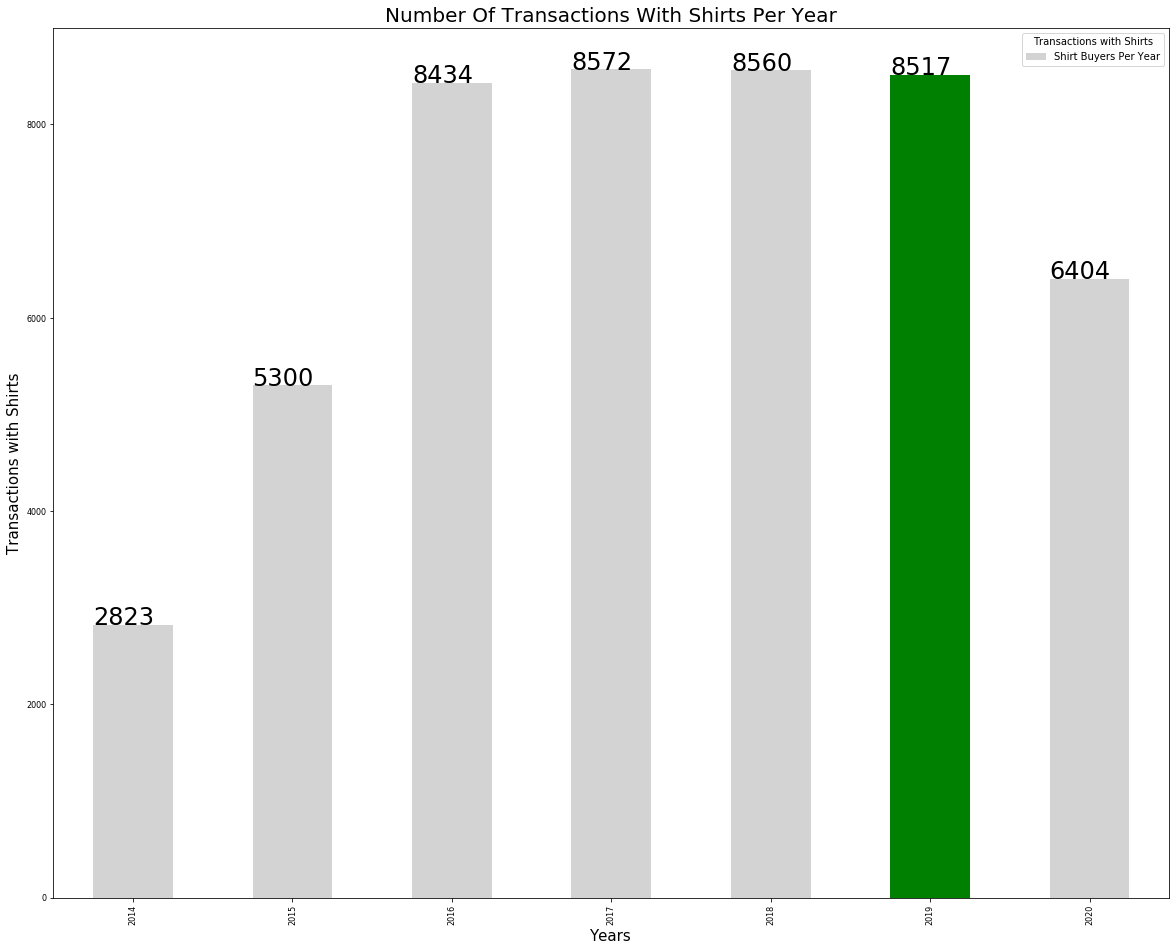

In [25]:
productsdfshirtsbar=shirtbuyers.groupby('order_date_year')['customer_id'].count()
productsdfshirtsbar


ax=productsdfshirtsbar.plot(kind='bar', label='Shirt Buyers Per Year',color=['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray','green','lightgray'],fontsize=8,figsize=(20, 16))
ax.set_ylabel('Transactions with Shirts',fontsize=15)
ax.set_xlabel('Years',fontsize=15)
plt.legend(title='Transactions with Shirts',fontsize=10)
plt.title("Number Of Transactions With Shirts Per Year",fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),size=24)
plt.savefig('shirtsalesoveryears.png') 


plt.show()


In [26]:
shirtbuyersnewdfunique=shirtbuyers.drop_duplicates('customer_id')
shirtbuyersnew=shirtbuyersnewdfunique[(shirtbuyersnewdfunique['order_date_year']==2019)]
len(shirtbuyersnew)

1329

In [27]:
list_of_names = shirtbuyersnew['customer_id'].to_list()

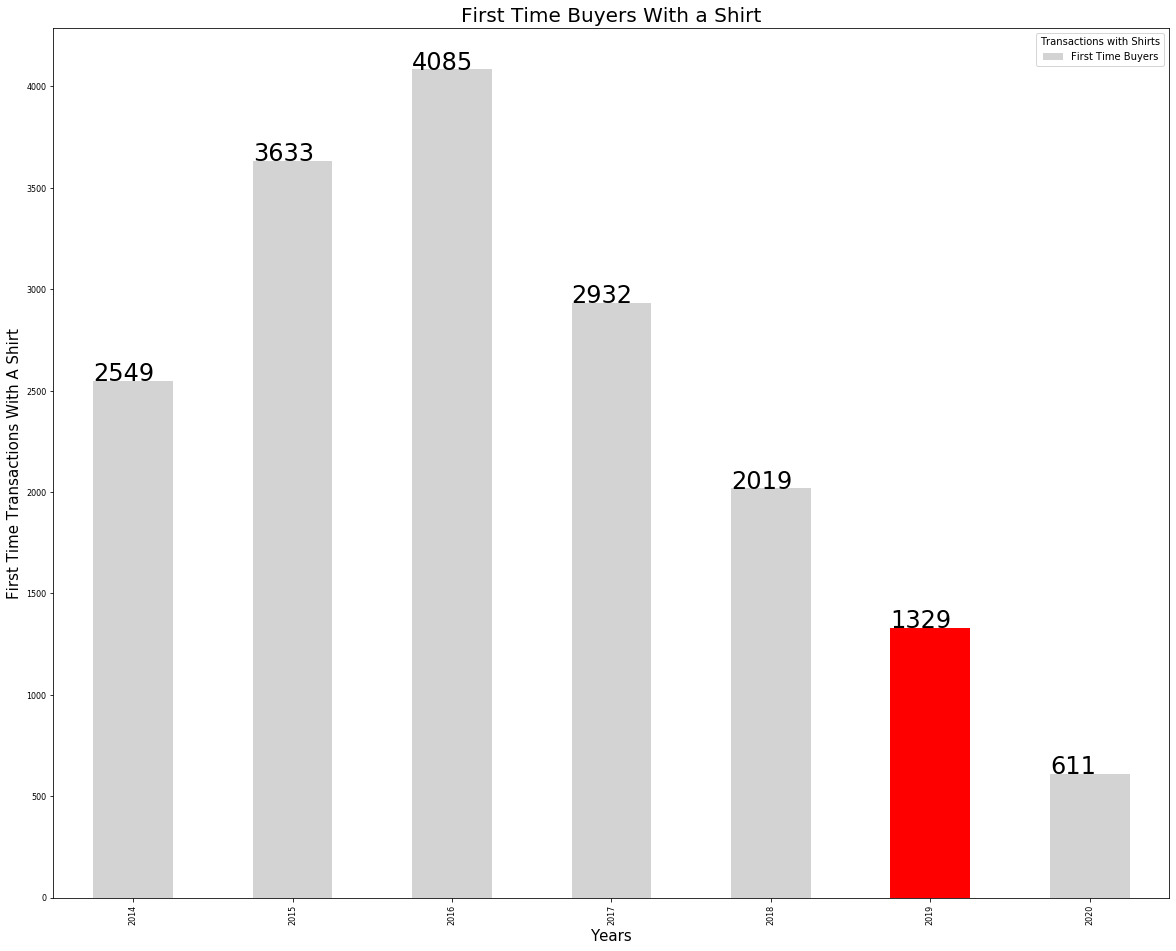

In [28]:
shirtbuyersnewbyyear=shirtbuyersnewdfunique.groupby('order_date_year')['customer_id'].count()

ax=shirtbuyersnewbyyear.plot(kind='bar', label='First Time Buyers',color=['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray','red','lightgray'],fontsize=8,figsize=(20, 16))
ax.set_ylabel('First Time Transactions With A Shirt',fontsize=15)
ax.set_xlabel('Years',fontsize=15)
plt.legend(title='Transactions with Shirts',fontsize=10)
plt.title("First Time Buyers With a Shirt",fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),size=24)
plt.savefig('uniquesalesofshirts.png') 


plt.show()

In [29]:
# According to the data, how many Shirt buyers were there in 2019? (i.e. customers who had a Shirt in an order in 2019)
shirts2019=shirtbuyers[(shirtbuyers['order_date_year']==2019)]
buyersafter2019=shirtbuyers[(shirtbuyers['order_date_year']>=2019)]


In [30]:
buyersofshirtsin2019=shirts2019[shirts2019['customer_id'].isin(list_of_names)]
len(buyersofshirtsin2019)

1498

In [31]:
uniqueshirtsbarimg=shirtbuyersnewbyyear.reset_index(name="First Time Buyers with Shirts")
# uniqueshirtsbarimg.dfi.export('dfshirtsbarunique.png')
# uniqueshirtsbarimg

In [32]:
shirtsbarimg=productsdfshirtsbar.reset_index(name="Number of Trans with Shirts")
# shirtsbarimg.dfi.export('dfshirtsbar.png')
# shirtsbarimg

In [33]:
shirtdatavg=shirtsbarimg.merge(uniqueshirtsbarimg, on='order_date_year',how='outer')
# shirtdatavg['% of New Buyers'] = (shirtdatavg['Number of Trans with Shirts']/shirtdatavg['Number of Trans with Shirts']*100).round(0).astype(str) + '%'
shirtdatavg

,order_date_year,Number of Trans with Shirts,First Time Buyers with Shirts
0,2014,2823,2549
1,2015,5300,3633
2,2016,8434,4085
3,2017,8572,2932
4,2018,8560,2019
5,2019,8517,1329
6,2020,6404,611


In [34]:
shirtdatavg['% of New Buyers'] = (shirtdatavg['First Time Buyers with Shirts']/shirtdatavg['Number of Trans with Shirts']*100).round(0).astype(str) + '%'
shirtdatavg

,order_date_year,Number of Trans with Shirts,First Time Buyers with Shirts,% of New Buyers
0,2014,2823,2549,90.0%
1,2015,5300,3633,69.0%
2,2016,8434,4085,48.0%
3,2017,8572,2932,34.0%
4,2018,8560,2019,24.0%
5,2019,8517,1329,16.0%
6,2020,6404,611,10.0%


In [35]:

# shirtdatavg.dfi.export('percentageoffirsttimebuyerswithshirts.png')


In [36]:
productsdf=df.groupby(['order_date','order_date_week','order_date_year','order_id','customer_id'])['product_category'].apply(list).reset_index(name='Products')

In [37]:
newbuyercounts=buyersofshirtsin2019['customer_id'].value_counts().reset_index(name="count_of_buys")
singlecustomers=(newbuyercounts[newbuyercounts['count_of_buys'] <= 1])
repeatcustomers=(newbuyercounts[newbuyercounts['count_of_buys'] >=2 ])
# newbuyercounts

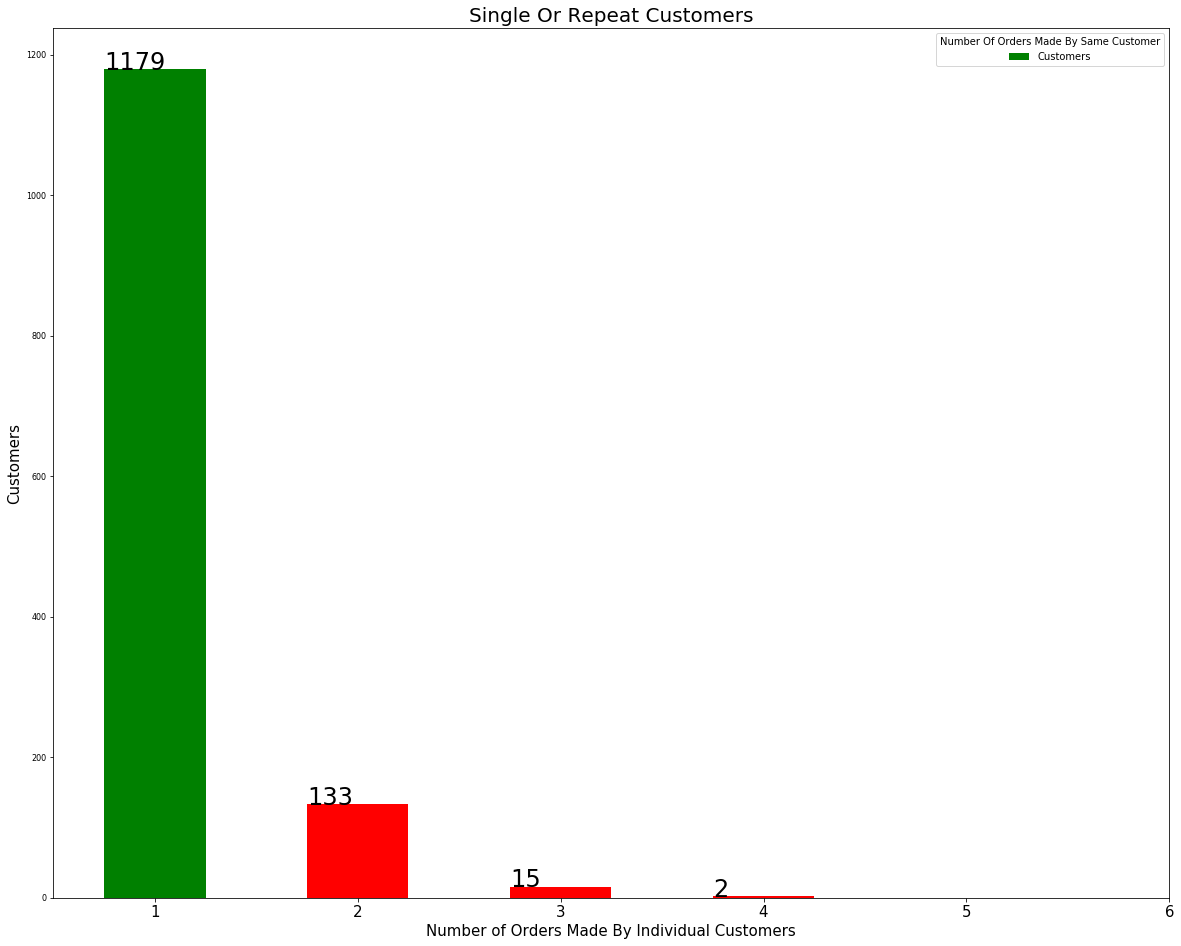

In [38]:
newbuyercountsunique=newbuyercounts['count_of_buys'].nunique()


newbuyercountsunique=newbuyercounts.groupby('count_of_buys')['count_of_buys'].value_counts()



ax=newbuyercountsunique.plot(kind='bar', label='Customers',color=['green', 'red', 'red', 'red', 'red','red', 'red', 'red','red'],fontsize=8,figsize=(20, 16))
positions = (0,1, 2, 3,4,5)
labels = ("1", "2", "3","4", "5", "6")
plt.xticks(positions, labels, rotation='horizontal',fontsize=15)

ax.set_ylabel('Customers',fontsize=15)
ax.set_xlabel('Number of Orders Made By Individual Customers',fontsize=15)
plt.legend(title='Number Of Orders Made By Same Customer',fontsize=10)
plt.title("Single Or Repeat Customers",fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),size=24)
plt.savefig('singleandrepeatbuyers.png') 


plt.show()

In [39]:

buyerofshirtsin2020=buyersofshirtsin2019[(buyersofshirtsin2019['order_date_year']==2019)]
pantsin2020=buyerofshirtsin2020[buyerofshirtsin2020['Products'].apply(lambda x: 'Pants' in x)]
pantsin2020


,order_date,order_date_week,order_date_year,customer_id,order_id,Products
46838,2019-01-01,1,2019,c42a5895db9e94efbce6,3fe4420217ed7f301657,"[Pants, Shirt, Pants]"
46874,2019-01-02,1,2019,e8052048650bfa8e6b0d,2e098bd8cca84d000437,"[Pants, Jacket, Shirt]"
46878,2019-01-03,1,2019,165680fa9db8ca30348b,fc4361133cb63205f8db,"[Shirt, Jacket, Pants]"
46934,2019-01-05,1,2019,4a79cfca302ae2b0bbf7,2cf1b0216e1c06ac1ce4,"[Pants, Shirt, Shirt, Pants]"
47021,2019-01-08,2,2019,0656930273528bbc6368,06e7e46aac280914ddc5,"[Pants, Shirt]"
...,...,...,...,...,...,...
58362,2019-12-25,52,2019,0610fd5166f70f3ffff8,a55323034d873347ce51,"[Pants, Jacket, Shirt]"
58385,2019-12-25,52,2019,bae69ccb482470632c18,43d3a2355944422aa17d,"[Shirt, Shirt, Pants, Shirt, Jacket, Jacket, P..."
58520,2019-12-30,1,2019,13d843dc0cf2811ea391,79c164ba16a37f2d2826,"[Pants, Jacket, Shirt]"
58530,2019-12-30,1,2019,6688ee128a671f5c82f5,a8a98ed675488dd759a6,"[Pants, Shirt, Shirt]"


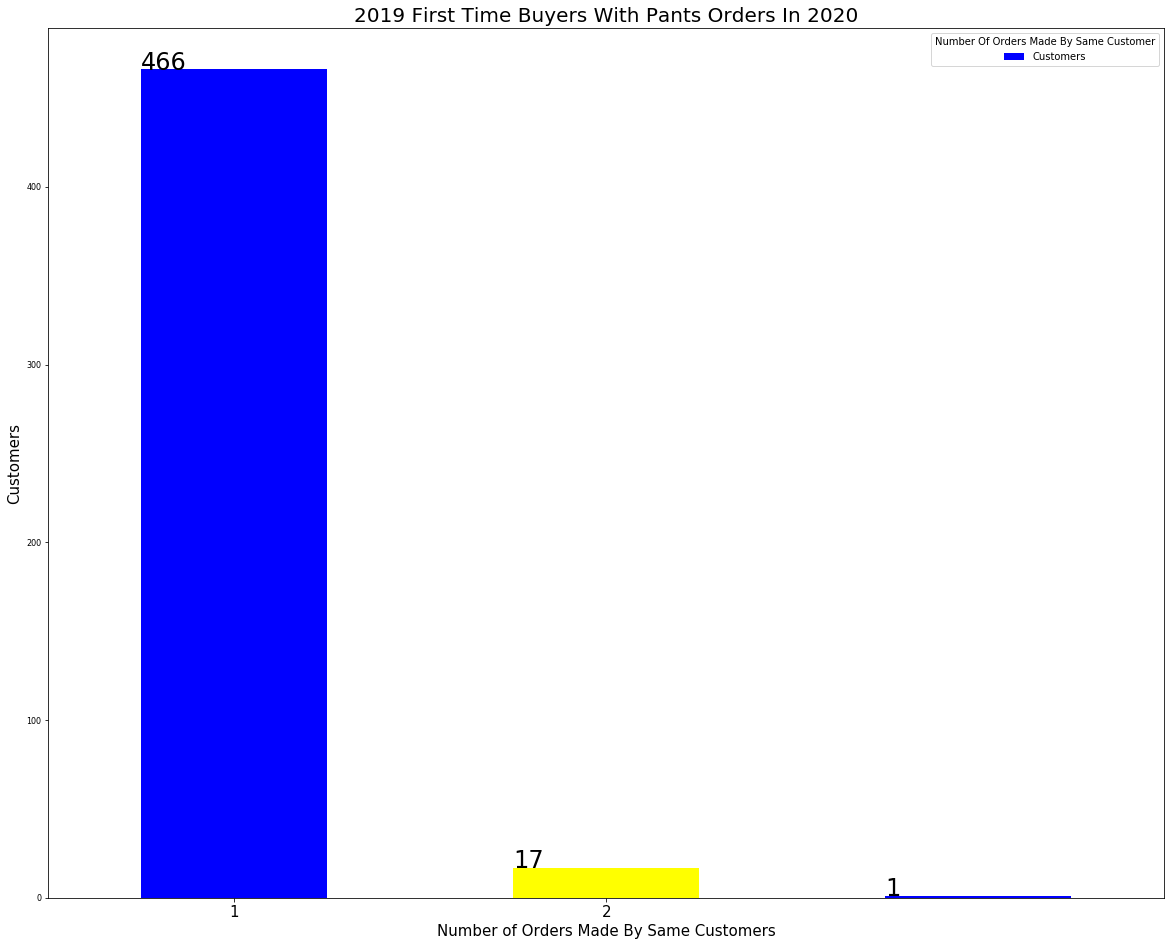

In [40]:
# repeatpantsbuyers=pantsin2020['customer_id'].nunique()

repeatpantsbuyers=pantsin2020['customer_id'].value_counts().reset_index()
repeatpantsbuyers

repeatpantsbuyers=repeatpantsbuyers.groupby('customer_id')['customer_id'].value_counts()

ax=repeatpantsbuyers.plot(kind='bar', label='Customers',color=['blue', 'yellow'],fontsize=8,figsize=(20, 16))
positions = (0,1 )
labels = ("1", "2")
plt.xticks(positions, labels, rotation='horizontal',fontsize=15)

ax.set_ylabel('Customers',fontsize=15)
ax.set_xlabel('Number of Orders Made By Same Customers',fontsize=15)
plt.legend(title='Number Of Orders Made By Same Customer',fontsize=10)
plt.title("2019 First Time Buyers With Pants Orders In 2020",fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),size=24)
plt.savefig('pants.png') 


plt.show()

In [41]:
# pantsin2020['customer_id'].value_counts()

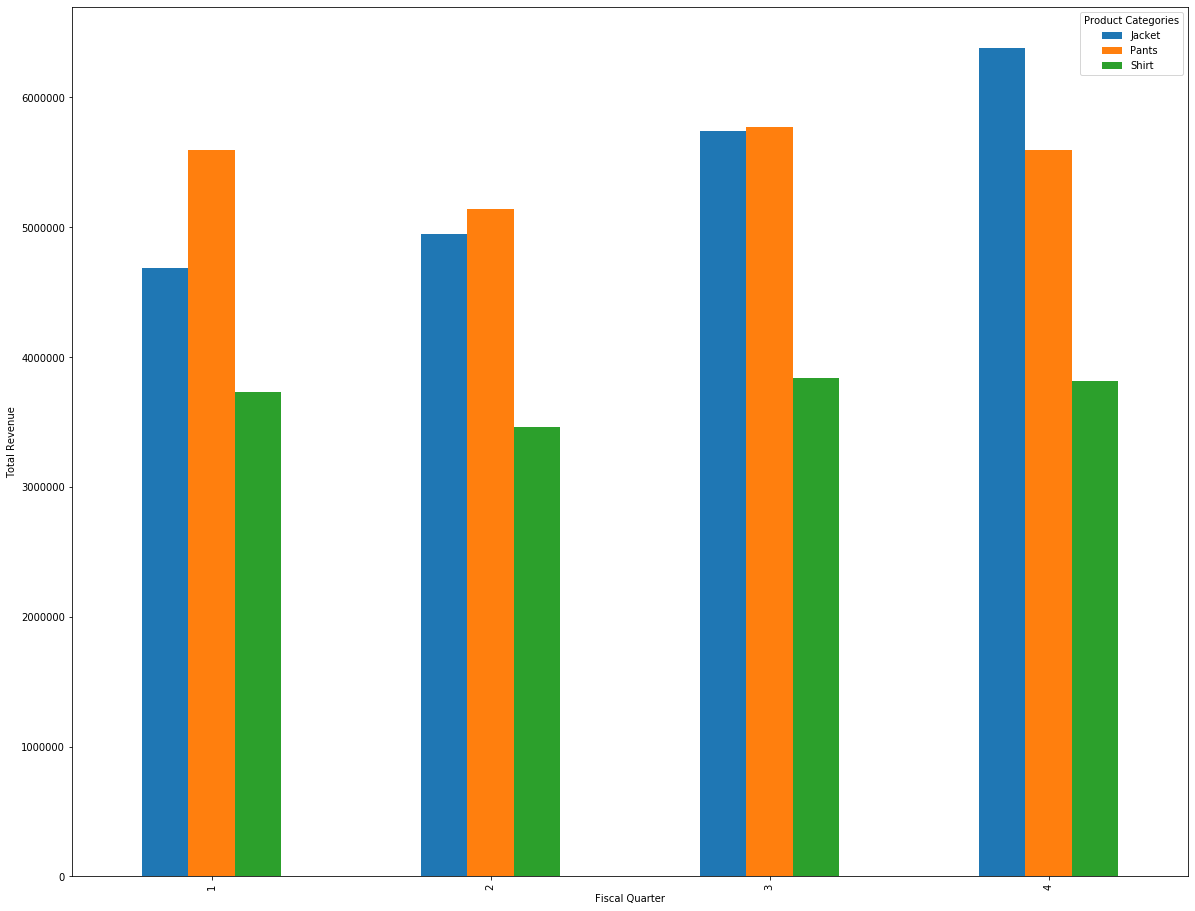

In [42]:
salesbyfiscalquarter=df.groupby(['fiscal_quarter', 'product_category',])['price_paid'].agg(['sum','mean','count']).reset_index()


salesbyfiscalquarterpivot=salesbyfiscalquarter.pivot("fiscal_quarter", "product_category", "sum")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=salesbyfiscalquarterpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Fiscal Quarter')
plt.legend(title='Product Categories')
plt.savefig('categoriesbyfiscalquartersales.png') 

plt.show()

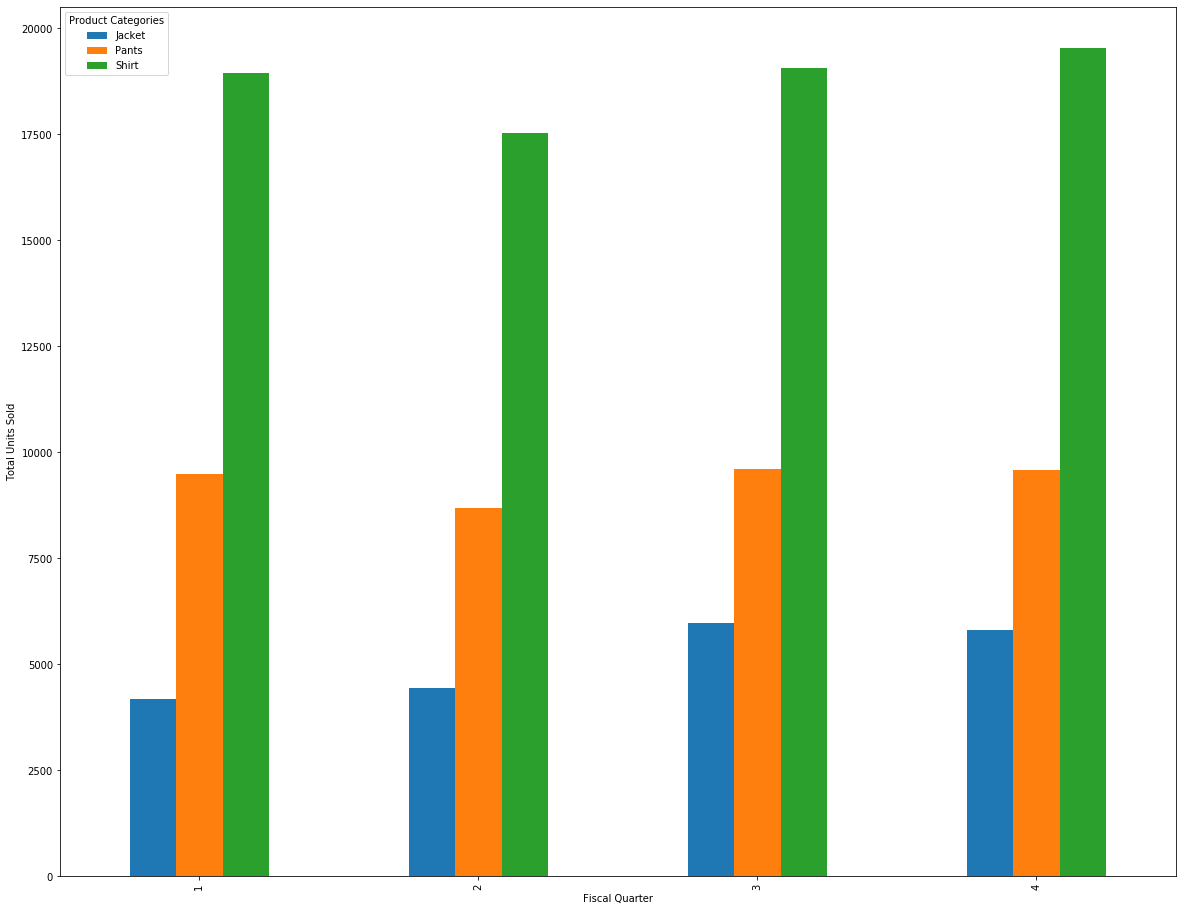

In [43]:
salesbyfiscalquarterproduct=df.groupby(['fiscal_quarter', 'product_category'])['product_category'].agg(['count']).reset_index()


salesbyfiscalquarterproductpivot=salesbyfiscalquarterproduct.pivot("fiscal_quarter", "product_category", "count")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=salesbyfiscalquarterproductpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Units Sold')
ax.set_xlabel('Fiscal Quarter')
plt.legend(title='Product Categories')
plt.savefig('categoryunitsbyquartersales.png') 
plt.show()

In [44]:

newsalesbyfiscalquarter=salesbyfiscalquarter.groupby('fiscal_quarter').agg({'sum':'sum','count':'sum','mean':'mean'})


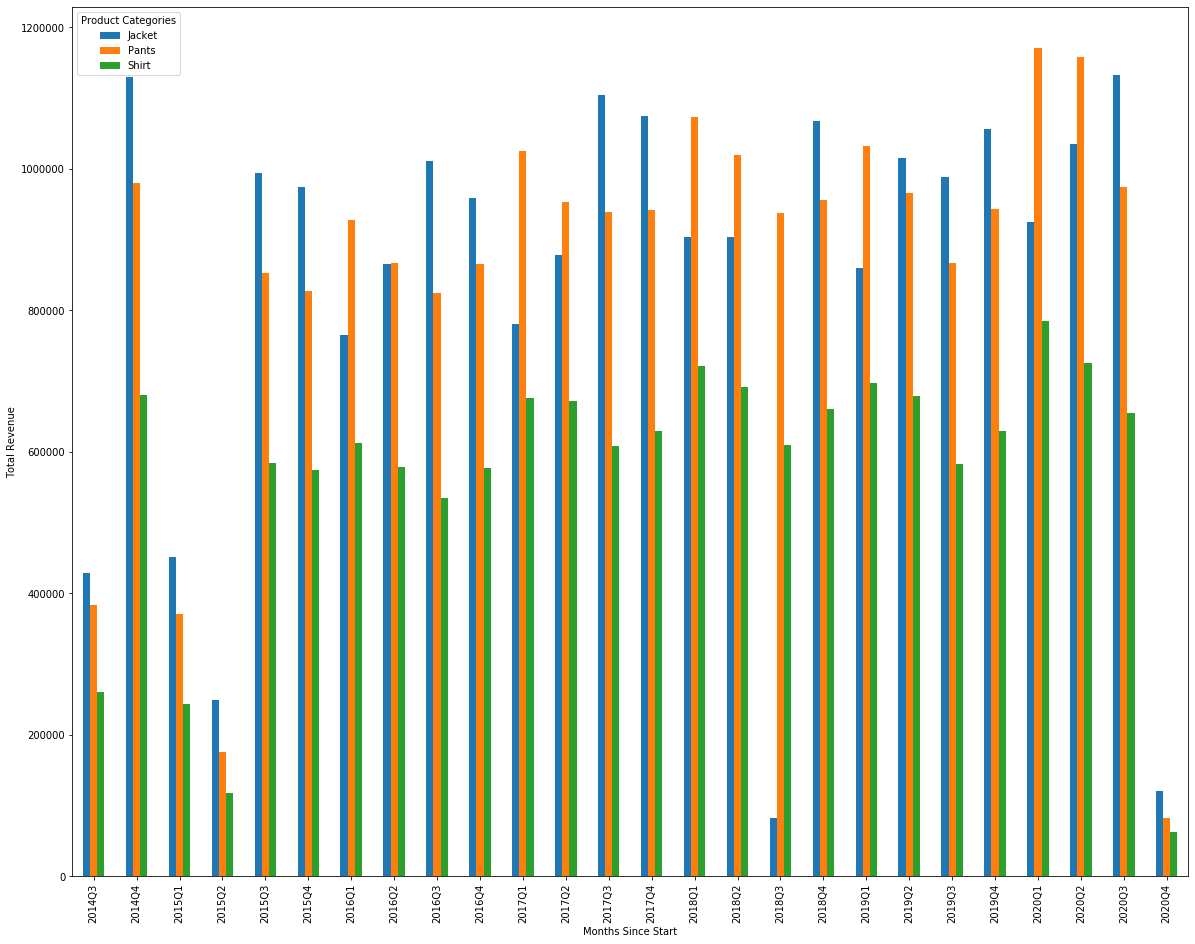

In [45]:
salesbyquarter=df.groupby(['quarter', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()


salesbyquarterpivot=salesbyquarter.pivot("quarter", "product_category", "sum")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=salesbyquarterpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Months Since Start')
plt.legend(title='Product Categories')
plt.savefig('categoriesbyquartersales.png') 
plt.show()

In [46]:
salesbyquarterproduct=df.groupby(['quarter', 'product_category'])['product_category'].agg(['count']).reset_index()


salesbyquarterproductpivot=salesbyquarterproduct.pivot("quarter", "product_category", "count")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

# ax=salesbyquarterproductpivot.plot(kind='line',  figsize=(20, 16))
# ax.set_ylabel('Total Revenue')
# ax.set_xlabel('Months Since Start')
# plt.legend(title='Product Categories')
# plt.savefig('missing2015.png') 
# plt.show()

In [47]:
newsalesbyfiscalquarter=salesbyfiscalquarter.groupby('fiscal_quarter').agg({'sum':'sum','count':'sum','mean':'mean'})

In [48]:
fiscalquarterwithrevenue=pd.merge(salesbyfiscalquarter,newsalesbyfiscalquarter, on='fiscal_quarter',how='inner')
fiscalquarterwithrevenue.rename(columns={ fiscalquarterwithrevenue.columns[2]: "Category Revenue",fiscalquarterwithrevenue.columns[3]: "Average Order Value", fiscalquarterwithrevenue.columns[4]: "Units Sold",fiscalquarterwithrevenue.columns[5]: "Total Revenue",fiscalquarterwithrevenue.columns[6]: "Total Units" ,fiscalquarterwithrevenue.columns[7]: "Average Sale Per Unit"}, inplace = True)

In [49]:
fiscalquarterwithrevenue.rename(columns={ fiscalquarterwithrevenue.columns[2]: "Category Revenue",fiscalquarterwithrevenue.columns[3]: "Average Order Value", fiscalquarterwithrevenue.columns[4]: "Units Sold",fiscalquarterwithrevenue.columns[5]: "Total Revenue",fiscalquarterwithrevenue.columns[6]: "Total Units" ,fiscalquarterwithrevenue.columns[7]: "Average Sale Per Unit"}, inplace = True)
fiscalquarterwithrevenue['Percent to Total Revenue']=(fiscalquarterwithrevenue['Category Revenue']/fiscalquarterwithrevenue['Total Revenue']*100).round(0).astype(str) + '%'
fiscalquarterwithrevenue['Percent to Total Units Sold']=(fiscalquarterwithrevenue['Units Sold']/fiscalquarterwithrevenue['Total Units']*100).round(0).astype(str) + '%'
fiscalquarterwithrevenue

# fiscalquarterwithrevenue.dfi.export('fiscalquarterwithrevenue.png')



,fiscal_quarter,product_category,Category Revenue,Average Order Value,Units Sold,Total Revenue,Total Units,Average Sale Per Unit,Percent to Total Revenue,Percent to Total Units Sold
0,1,Jacket,4.685423e+06,1119.307981,4186,1.401674e+07,32631,635.276750,33.0%,13.0%
1,1,Pants,5.597841e+06,589.494591,9496,1.401674e+07,32631,635.276750,40.0%,29.0%
2,1,Shirt,3.733477e+06,197.027677,18949,1.401674e+07,32631,635.276750,27.0%,58.0%
3,2,Jacket,4.946107e+06,1111.984383,4448,1.354427e+07,30677,633.469165,37.0%,14.0%
4,2,Pants,5.136993e+06,591.070369,8691,1.354427e+07,30677,633.469165,38.0%,28.0%
...,...,...,...,...,...,...,...,...,...,...
7,3,Pants,5.775343e+06,600.972249,9610,1.535190e+07,34639,587.894423,38.0%,28.0%
8,3,Shirt,3.835791e+06,201.269324,19058,1.535190e+07,34639,587.894423,25.0%,55.0%
9,4,Jacket,6.379773e+06,1097.689808,5812,1.578569e+07,34941,625.307071,40.0%,17.0%
10,4,Pants,5.592575e+06,583.045746,9592,1.578569e+07,34941,625.307071,35.0%,27.0%


In [93]:
monthinfiscalquarter=df[(df['fiscal_quarter']==1)]
salesbyfiscalmonth=df.groupby(['order_date_month', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()
monthinfiscalquarter

,customer_id,order_id,order_date,price_paid,product_category,Start of Data,order_date_week,order_date_month,order_date_year,quarter,fiscal_quarter,weeks_since_start,months_since_start
7686,9148f8e16c0da0f00bfd,817f028c5b40983cb646,2015-01-01,320.363200,Shirt,2014-08-16,1,1,2015,2015Q1,1,21.0,6.0
7687,9148f8e16c0da0f00bfd,817f028c5b40983cb646,2015-01-01,297.515901,Shirt,2014-08-16,1,1,2015,2015Q1,1,21.0,6.0
7688,5b89abaefc4569e5750a,624cfe96982b2521fa05,2015-01-01,907.559334,Pants,2014-08-16,1,1,2015,2015Q1,1,21.0,6.0
7689,5a2135f1ee9e5f278560,6ddaa5ea690c25f72cb3,2015-01-01,302.451868,Shirt,2014-08-16,1,1,2015,2015Q1,1,21.0,6.0
7690,5a2135f1ee9e5f278560,6ddaa5ea690c25f72cb3,2015-01-01,1100.206544,Jacket,2014-08-16,1,1,2015,2015Q1,1,21.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121739,f632bad5325b34d544cb,be17651c342ac2995a27,2020-03-31,262.961213,Shirt,2014-08-16,14,3,2020,2020Q1,1,294.0,68.0
121740,1974fa5e5d694d01ae1e,fc2e5bcc2e0522c50685,2020-03-31,1485.824416,Jacket,2014-08-16,14,3,2020,2020Q1,1,294.0,68.0
121741,b1276b85b7f2a42c596c,458caebb83c9f28b9001,2020-03-31,149.906941,Shirt,2014-08-16,14,3,2020,2020Q1,1,294.0,68.0
121742,fbff836afd309ad5506a,ba32c3e9cc5df26a5353,2020-03-31,132.079599,Shirt,2014-08-16,14,3,2020,2020Q1,1,294.0,68.0


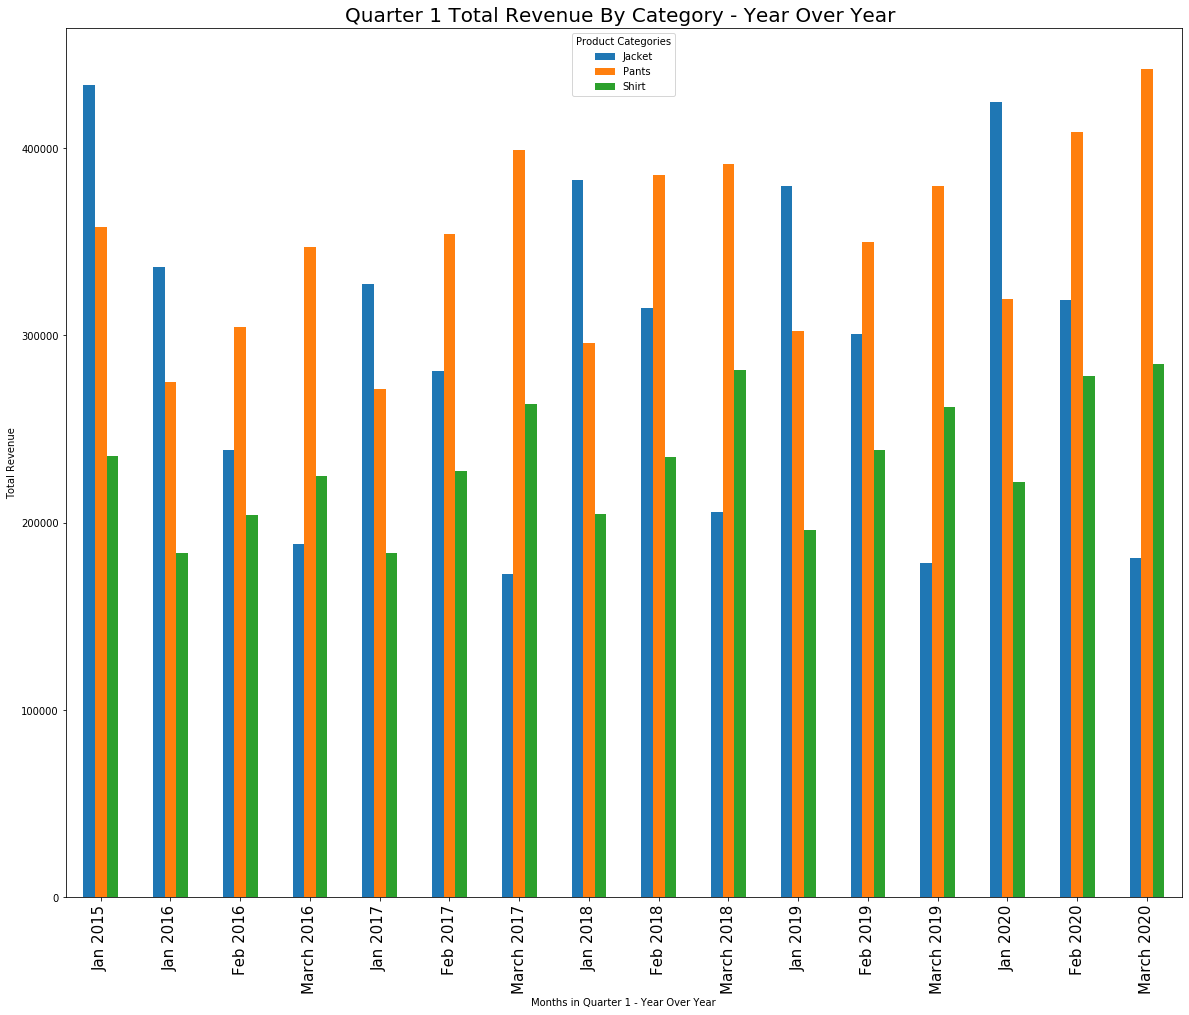

In [94]:

newmonthinfiscal=monthinfiscalquarter.groupby(['months_since_start', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()


newmonthinfiscalpivot=newmonthinfiscal.pivot("months_since_start", "product_category", "sum")
newmonthinfiscalpivot=newmonthinfiscalpivot.drop(newmonthinfiscalpivot.index[1])

ax=newmonthinfiscalpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Months in Quarter 1 - Year Over Year')
positions = (0,1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15)
labels = ("Jan 2015","Jan 2016","Feb 2016", "March 2016","Jan 2017", "Feb 2017", "March 2017","Jan 2018", "Feb 2018", "March 2018","Jan 2019", "Feb 2019", "March 2019","Jan 2020", "Feb 2020", "March 2020")
plt.xticks(positions, labels, rotation='vertical',fontsize=15)
plt.title("Quarter 1 Total Revenue By Category - Year Over Year ",fontsize=20)

plt.legend(title='Product Categories')
plt.savefig('newmonthpivot.png') 


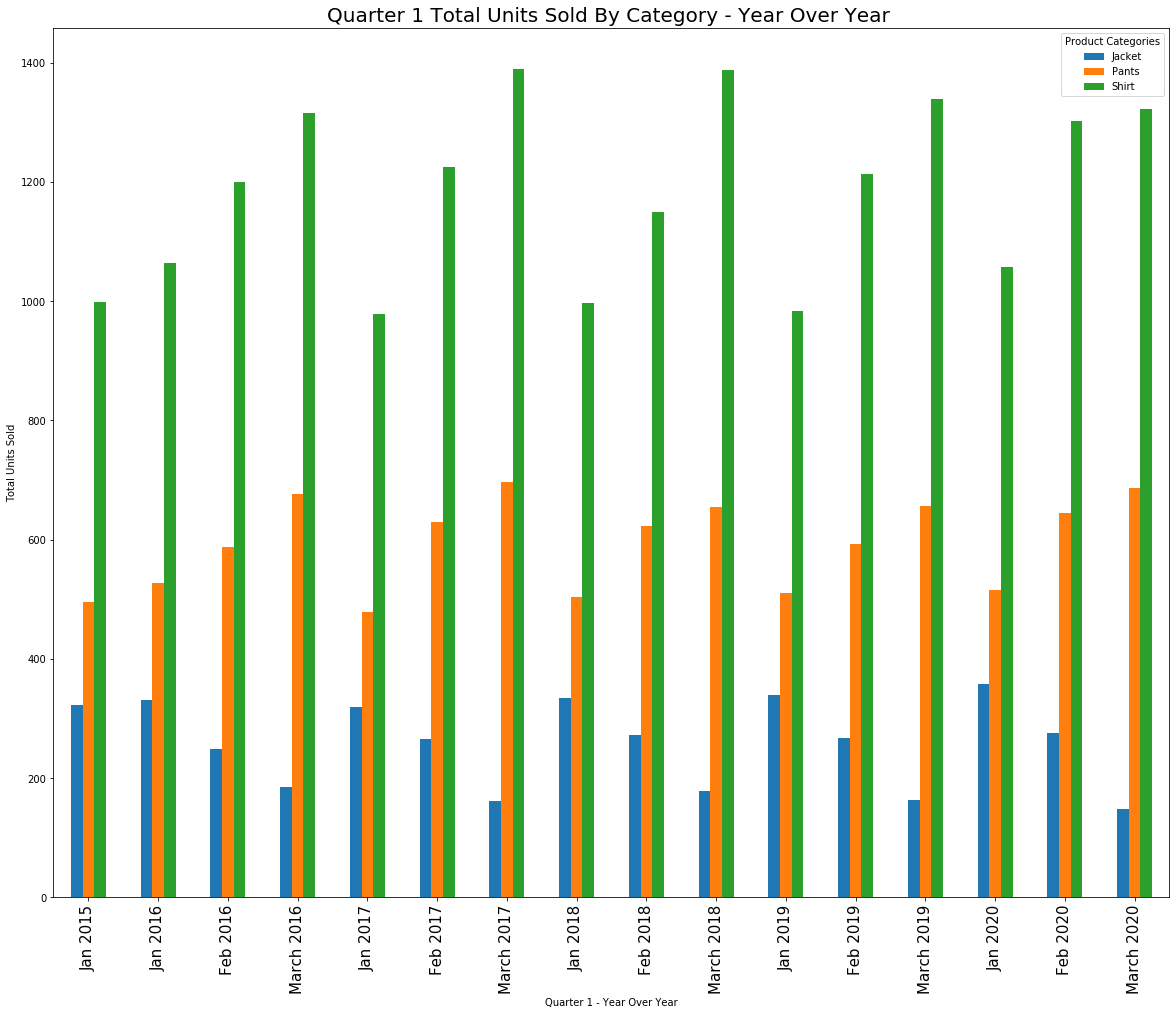

In [95]:

newmonthinfiscalproduct=monthinfiscalquarter.groupby(['months_since_start', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()


newmonthinfiscalpivotproduct=newmonthinfiscalproduct.pivot("months_since_start", "product_category", "count")
newmonthinfiscalpivotproduct=newmonthinfiscalpivotproduct.drop(newmonthinfiscalpivotproduct.index[1])


ax=newmonthinfiscalpivotproduct.plot(kind='bar',  figsize=(20, 16))

ax.set_ylabel('Total Units Sold')
ax.set_xlabel('Quarter 1 - Year Over Year')
plt.xticks(positions, labels, rotation='vertical',fontsize=15)
positions = (0,1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15)
labels = ("Jan 2015","Jan 2016","Feb 2016", "March 2016","Jan 2017", "Feb 2017", "March 2017","Jan 2018", "Feb 2018", "March 2018","Jan 2019", "Feb 2019", "March 2019","Jan 2020", "Feb 2020", "March 2020")
plt.legend(title='Product Categories')
plt.title("Quarter 1 Total Units Sold By Category - Year Over Year ",fontsize=20)
plt.savefig('newmonthpivotproduct.png') 
plt.show()

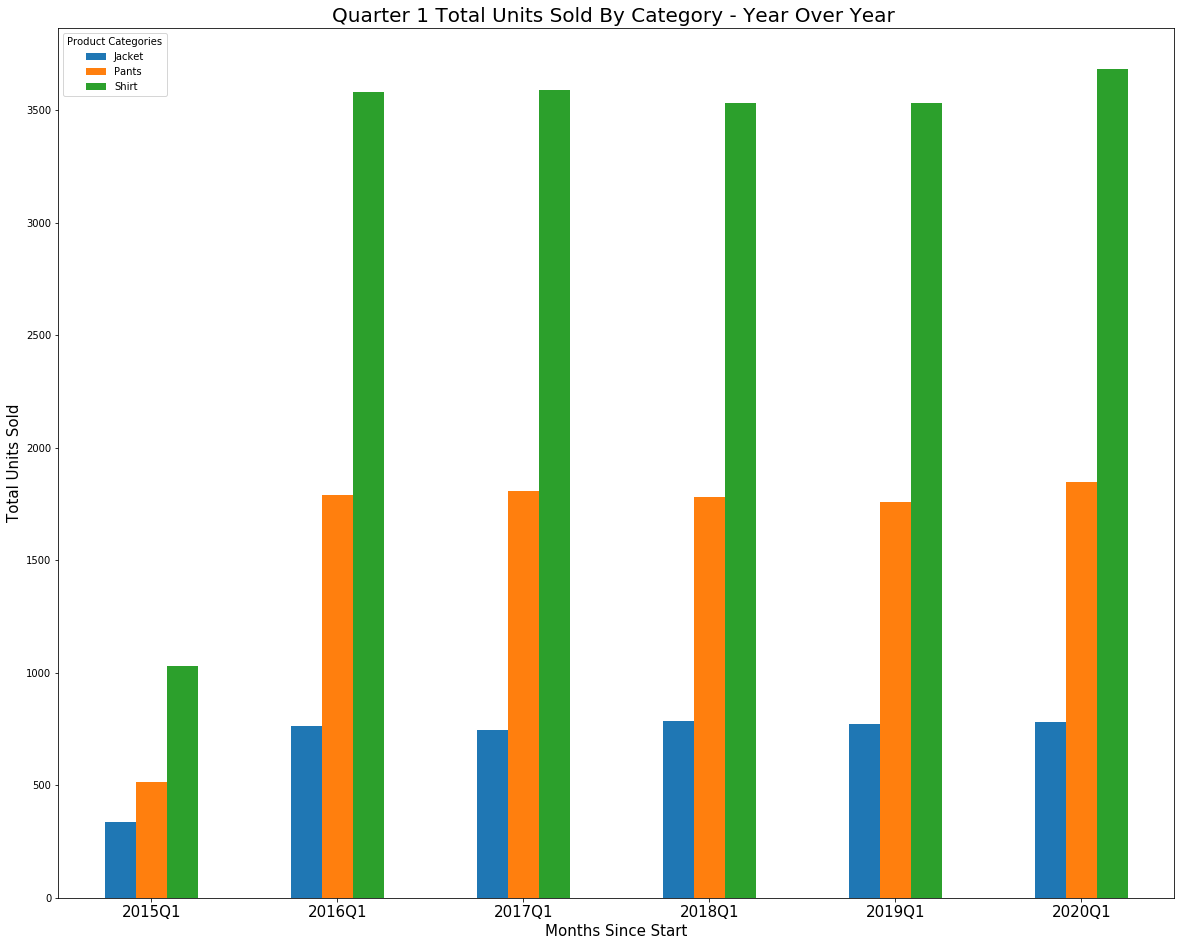

In [53]:
newmonthinfiscalquarterunitssold=monthinfiscalquarter.groupby(['quarter', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()


monthinfiscalquarterpivotunitsold=newmonthinfiscalquarterunitssold.pivot("quarter", "product_category", "count")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=monthinfiscalquarterpivotunitsold.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Units Sold', fontsize=15)
ax.set_xlabel('Months Since Start',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
plt.savefig('salesbyequartercategoryunits.png',fontsize=20) 
plt.title("Quarter 1 Total Units Sold By Category - Year Over Year ",fontsize=20)





plt.show()


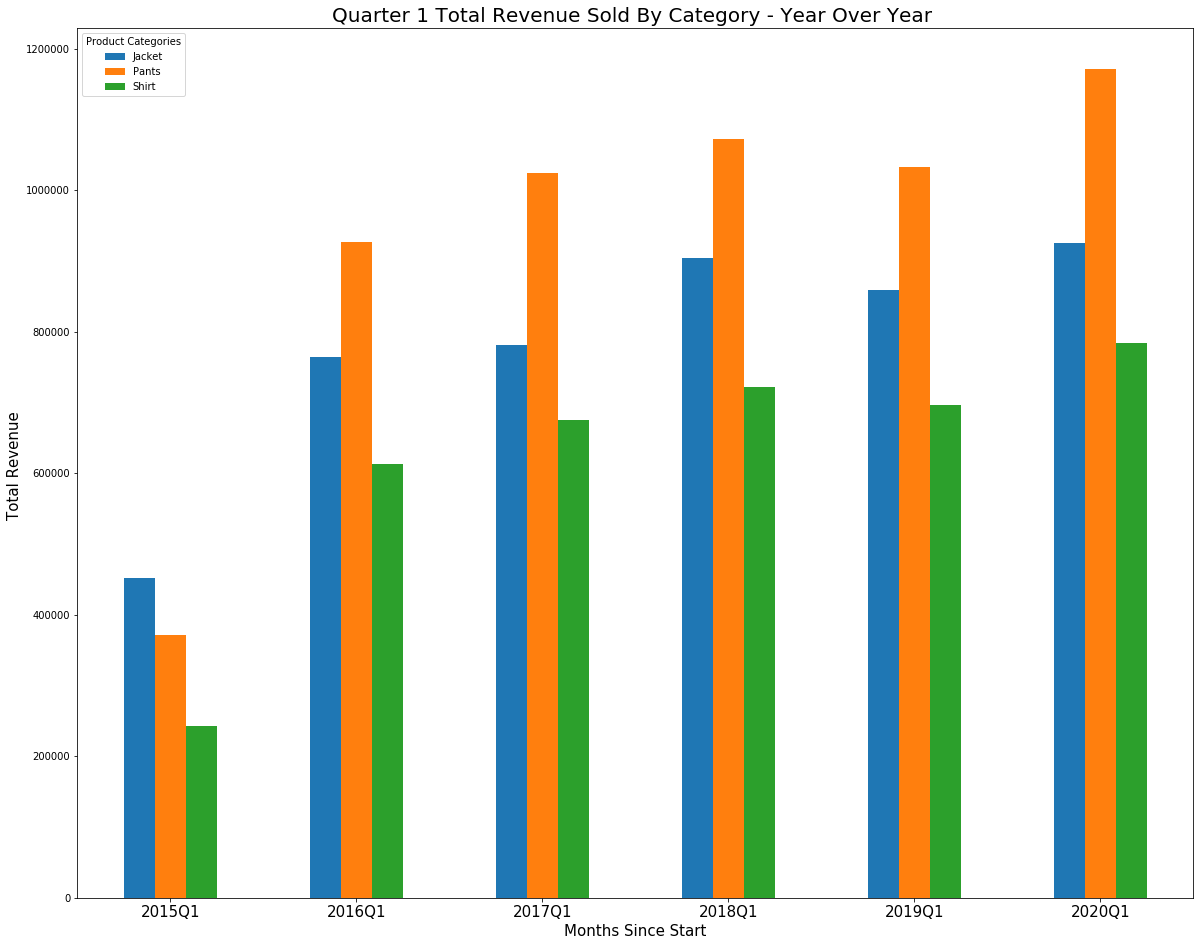

In [54]:
newmonthinfiscalquarter=monthinfiscalquarter.groupby(['quarter', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()


monthinfiscalquarterpivot=newmonthinfiscalquarter.pivot("quarter", "product_category", "sum")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=monthinfiscalquarterpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Revenue ', fontsize=15)
ax.set_xlabel('Months Since Start',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
plt.savefig('salesbyequartercategory.png',fontsize=20) 
plt.title("Quarter 1 Total Revenue Sold By Category - Year Over Year ",fontsize=20)





plt.show()
plt.show()

In [55]:
totalnewmonthinfiscalquarterunitssold=newmonthinfiscalquarterunitssold.groupby('quarter').agg({'sum':'sum','count':'sum','mean':'mean'})

In [56]:
monthbyfiscalquarter=df.groupby(['quarter', 'product_category'])['product_category'].agg(['count']).reset_index()

In [57]:
newmonthinfiscalquarterunitssold=monthinfiscalquarter.groupby(['quarter', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()

In [58]:
newmonthinfiscalquarterrevenue=pd.merge(newmonthinfiscalquarterunitssold,totalnewmonthinfiscalquarterunitssold, on='quarter',how='inner')
newmonthinfiscalquarterrevenue.rename(columns={ newmonthinfiscalquarterrevenue.columns[2]: "Category Revenue",newmonthinfiscalquarterrevenue.columns[3]: "Average Order Value", newmonthinfiscalquarterrevenue.columns[4]: "Units Sold",newmonthinfiscalquarterrevenue.columns[5]: "Total Revenue",newmonthinfiscalquarterrevenue.columns[6]: "Total Units" ,newmonthinfiscalquarterrevenue.columns[7]: "Total Average Order Value"}, inplace = True)
newmonthinfiscalquarterrevenue['Percent to Total Revenue']=(newmonthinfiscalquarterrevenue['Category Revenue']/newmonthinfiscalquarterrevenue['Total Revenue']*100).round(0).astype(str) + '%'
newmonthinfiscalquarterrevenue['Percent to Total Units Sold']=(newmonthinfiscalquarterrevenue['Units Sold']/newmonthinfiscalquarterrevenue['Total Units']*100).round(0).astype(str) + '%'

newmonthinfiscalquarterrevenue



# newmonthinfiscalquarterrevenue.dfi.export('newmonthinfiscalquarterrevenue.png')


,quarter,product_category,Category Revenue,Average Order Value,Units Sold,Total Revenue,Total Units,Total Average Order Value,Percent to Total Revenue,Percent to Total Units Sold
0,2015Q1,Jacket,4.518674e+05,1340.852729,337,1.065770e+06,1881,766.523319,42.0%,18.0%
1,2015Q1,Pants,3.709196e+05,723.040233,513,1.065770e+06,1881,766.523319,35.0%,27.0%
2,2015Q1,Shirt,2.429830e+05,235.676994,1031,1.065770e+06,1881,766.523319,23.0%,55.0%
3,2016Q1,Jacket,7.645060e+05,999.354300,765,2.304533e+06,6136,562.661096,33.0%,12.0%
4,2016Q1,Pants,9.271628e+05,517.389937,1792,2.304533e+06,6136,562.661096,40.0%,29.0%
...,...,...,...,...,...,...,...,...,...,...
13,2019Q1,Pants,1.032182e+06,587.134120,1758,2.587783e+06,6063,632.785583,40.0%,29.0%
14,2019Q1,Shirt,6.966292e+05,197.122020,3534,2.587783e+06,6063,632.785583,27.0%,58.0%
15,2020Q1,Jacket,9.251376e+05,1184.555205,781,2.880097e+06,6308,677.242957,32.0%,12.0%
16,2020Q1,Pants,1.170461e+06,634.052813,1846,2.880097e+06,6308,677.242957,41.0%,29.0%


In [60]:
simplifiedbyquarter=newmonthinfiscalquarterrevenue.drop(columns=['Category Revenue', 'Average Order Value', 'Units Sold', 'Total Revenue', 'Total Units', 'Total Average Order Value',])
# simplifiedbyquarter.dfi.export('simplifiedbyquarter.png')

In [96]:
monthsorder=monthinfiscalquarter.groupby(['order_date_month','product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()

In [97]:
monthsorder

,order_date_month,product_category,sum,mean,count
0,1,Jacket,2.376667e+06,1139.341837,2086
1,1,Pants,1.887855e+06,601.610949,3138
2,1,Shirt,1.280284e+06,201.334218,6359
3,2,Jacket,1.340047e+06,1093.916318,1225
4,2,Pants,1.675584e+06,585.663812,2861
5,2,Shirt,1.091766e+06,194.471970,5614
6,3,Jacket,9.687086e+05,1107.095596,875
7,3,Pants,2.034401e+06,581.756166,3497
8,3,Shirt,1.361428e+06,195.158762,6976


In [ ]:
monthsorderpivot=monthsorder.pivot('order_date_month','product_category','sum')

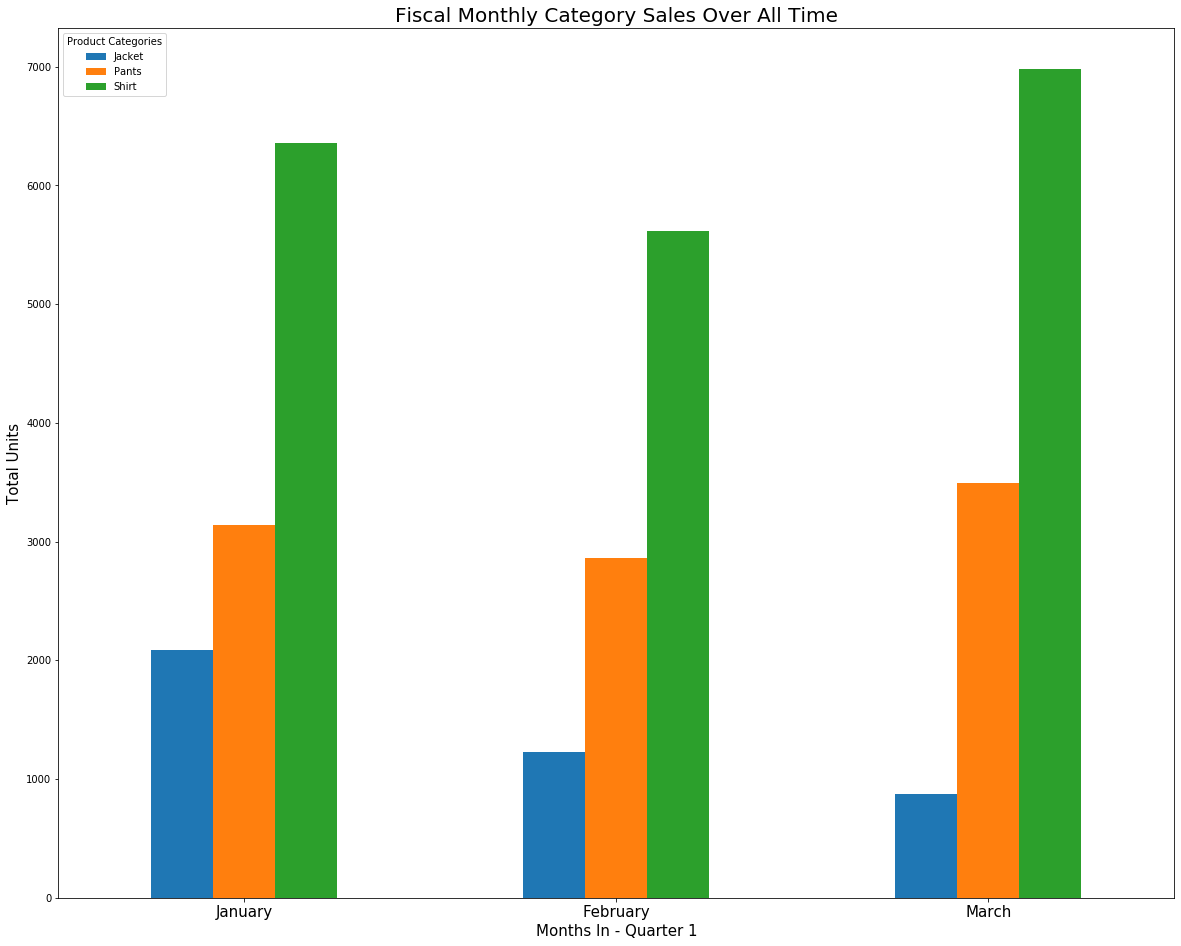

In [106]:
monthsorderpivotproduct=monthsorder.pivot('order_date_month','product_category','count')

# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=monthsorderpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Units',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=15)
ax.set_xlabel('Months In - Quarter 1',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
positions1 = (0,1, 2)
labels1 = ('January','February','March')
plt.xticks(positions1, labels1, rotation='horizontal',fontsize=15)
plt.legend(title='Product Categories')
plt.title("Fiscal Monthly Category Units Sold Over All Time",fontsize=20)
plt.savefig('salesbymonthquarter.png') 
plt.show()

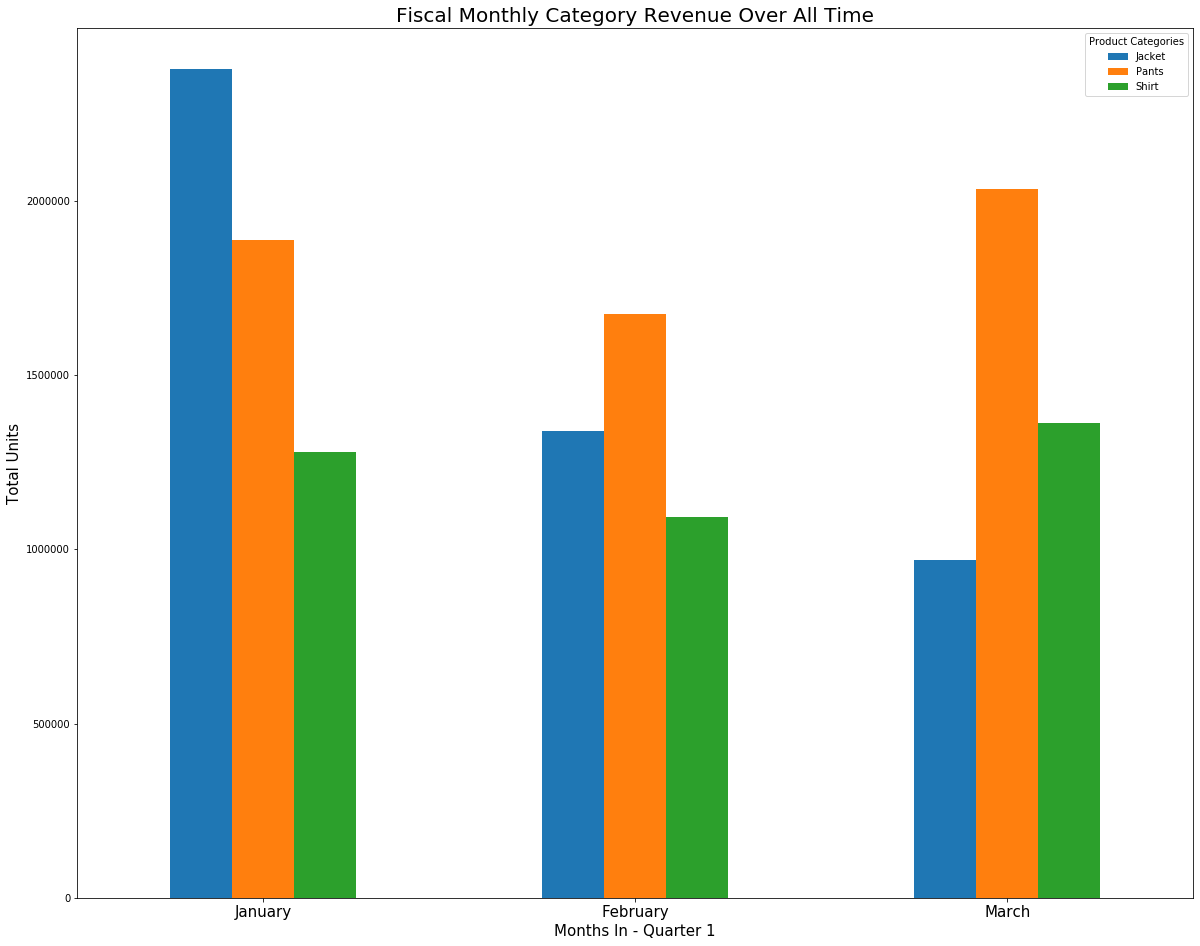

In [108]:
monthsorderpivot=monthsorder.pivot('order_date_month','product_category','sum')

ax=monthsorderpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Units',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=15)
ax.set_xlabel('Months In - Quarter 1',fontsize=15)
plt.legend(title='Product Categories',fontsize=10)
positions1 = (0,1, 2)
labels1 = ('January','February','March')
plt.xticks(positions1, labels1, rotation='horizontal',fontsize=15)
plt.legend(title='Product Categories')
plt.title("Fiscal Monthly Category Revenue Over All Time",fontsize=20)
plt.savefig('salesbymonthquarterrev.png') 
plt.show()

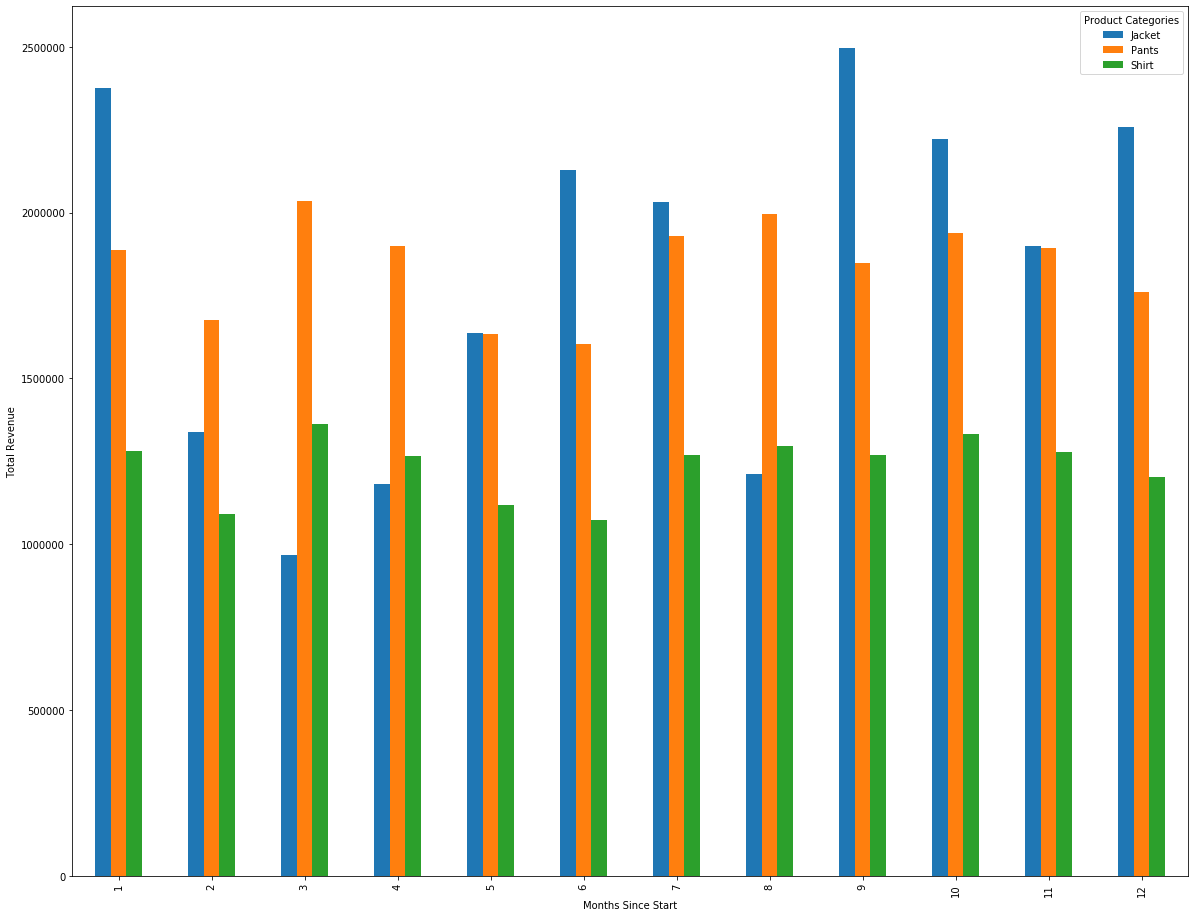

In [99]:
salesbyfiscalmonth=df.groupby(['order_date_month', 'product_category'])['price_paid'].agg(['sum','mean','count']).reset_index()


salesbyfiscalmonthpivot=salesbyfiscalmonth.pivot("order_date_month", "product_category", "sum")
# salesbymonthssincestartpivot=salesbymonthssincestartpivot.plot(kind='bar', stacked=True)

ax=salesbyfiscalmonthpivot.plot(kind='bar',  figsize=(20, 16))
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Months Since Start')
plt.legend(title='Product Categories')
plt.savefig('salesbymonth.png') 
plt.show()

In [65]:
# salesbyyear=df.groupby(['order_date_year', 'product_category'])['price_paid'].sum().reset_index()


# salesbyyearpivot=salesbyyear.pivot("order_date_year", "product_category", "price_paid")

In [66]:
# ax=salesbyyearpivot.plot(kind='bar',figsize=(10, 6))
# ax.set_ylabel('Total Revenue')
# ax.set_xlabel('Sales By Fiscal Week')
# plt.legend(title='Product Categories')
# plt.savefig('salesbyyear.png') 
# plt.show()